# Simplification of Terrian using Voronoi Delaunay Teselesation

## Background

[MAP GENERALIZATION BY SKELETON RETRACTION](http://icaci.org/files/documents/ICC_proceedings/ICC2001/icc2001/file/f13034.pdf)

[Crust and Anti-Crust: A One-Step Boundary and Skeleton Extraction Algorithm](https://pdfs.semanticscholar.org/164c/7fbe0ab8126b93020153d774780d875f7d69.pdf)

[ADVANTAGES OF THE VORONOI SPATIAL MODEL](https://pdfs.semanticscholar.org/13db/35133b613038ceb635e7e367749d87a94a9a.pdf)

[The Quad-Arc Data Structure](https://www.voronoi.com/wiki/images/4/4d/The_Quad-Arc_data_structure.pdf)

[C++ implementation of Quad Arc data structure](http://www.cs.cmu.edu/afs/andrew/scs/cs/15-463/2001/pub/src/a2/quadedge.html)

## Suplimental sites

[Voronoi.com](https://www.voronoi.com)

[Fortune's algorithm](https://en.wikipedia.org/wiki/Fortune's_algorithm)

[Steve Fortunes site](http://ect.bell-labs.com/who/sjf/)

[- alternate](http://www3.cs.stonybrook.edu/~algorith/implement/fortune/implement.shtml)

[Fortune's algorithm in Java Script by Raymond Hill](http://www.raymondhill.net/voronoi/rhill-voronoi.html)

[GitHub for Raymond Hill's Javascript](https://github.com/gorhill/Javascript-Voronoi)

[pyDelaunay2D](https://github.com/jmespadero/pyDelaunay2D)

[Fortune’s algorithm and implementation](http://blog.ivank.net/fortunes-algorithm-and-implementation.html)

[Another C++ implementation](https://www.cs.hmc.edu/~mbrubeck/voronoi.html)

### Misc
[Simplification of objects for adaptive matching and visualization](http://compbio.mit.edu/publications/_ConferencesBookChapters.pdf)

[SweepLine Voronoi](http://www.wias-berlin.de/people/si/course/files/Fortune87-SweepLine-Voronoi.pdf)

[scipy spacial library](https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/spatial.html)  "The Delaunay triangulation is a subdivision of a set of points into a non-overlapping set of triangles, such that no point is inside the circumcircle of any triangle. In practice, such triangulations tend to avoid triangles with small angles."

```python
from scipy.spatial import Delaunay
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)
```
"scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the **Qhull library**."

***note:** using QHull "http://qhull.org/html/qvoronoi.htm - **Qhull computes the Voronoi diagram via the Delaunay** triangulation."*

### [NON Qhull Line Simplification](https://bost.ocks.org/mike/simplify/)
"To simplify geometry to suit the displayed resolution, various line simplification algorithms exist. While Douglas–Peucker is the most well-known, Visvalingam’s algorithm may be more effective and has a remarkably intuitive explanation: it progressively removes points with the least-perceptible change."

In [126]:
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
import numpy as np
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1], [0.5, 0.25], [0.74, 1.3], [0.4, 0.13], \
                   [0.04, 1.3], [0.24, 0.213], [0.54, 0.83]])
tri = Delaunay(points)

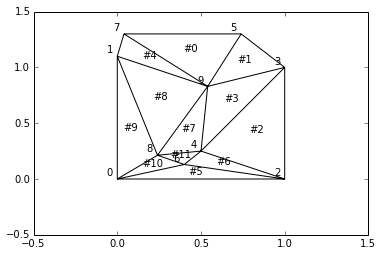

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 1.5)
plt.show()

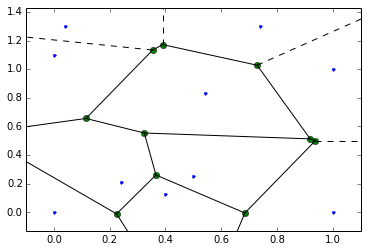

In [128]:
vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()

In [6]:
from IPython.display import IFrame
IFrame("https://en.wikipedia.org/wiki/Fortune's_algorithm#Pseudocode", width=850, height=800)

In [7]:
from IPython.display import IFrame
IFrame('http://www.raymondhill.net/voronoi/rhill-voronoi.html', width=850, height=800)

# Open Source GIS Software, Tools, and Data

[List of tools](https://en.wikipedia.org/wiki/List_of_geographic_information_systems_software)

### Army Core of Engineers 
[GRASS GIS](https://en.wikipedia.org/wiki/GRASS_GIS) "**Geographic Resources Analysis Support System** (commonly termed GRASS GIS) is a geographic information system (GIS) software suite used for geospatial data management and analysis, image processing, producing graphics and maps, spatial and temporal modeling, and visualizing." ***note: Written in	C, C++, Python, Tcl***

[home page](http://grass.osgeo.org/)

[python script](https://grasswiki.osgeo.org/wiki/GRASS_Python_Scripting_Library)

```python
import sys
from grass.script import core as grass

def main():
    drape_map = options['drapemap']
    relief_map = options['reliefmap']
    brighten = options['brighten']
    ret = grass.run_command("d.his", h_map = drape_map,  i_map = relief_map, brighten = brighten)
    sys.exit(ret)

if __name__ == "__main__":
    options, flags = grass.parser()
    main()
```

### Capaware
[Capaware](https://en.wikipedia.org/wiki/Capaware) "**Capaware** is a 3D general purpose virtual worlds viewer."
[home page](http://www.capaware.org/)

## USGS Data

### NHD - National Hydrography Dataset 
[NHD](https://nhd.usgs.gov/) "The **National Hydrography Dataset (NHD)** and Watershed Boundary Dataset (WBD) are used to portray surface water on The National Map."

[data set PDF](https://nhd.usgs.gov/NHDv2.2.1_poster_081216.pdf)


## Related

### OSM
[OpenStreetMap](https://en.wikipedia.org/wiki/OpenStreetMap) "**OpenStreetMap (OSM)** is a collaborative project to create a free editable map of the world."
[home page](https://www.openstreetmap.org/)



# Quad Edge PsuedoCode 

[source](https://www.voronoi.com/wiki/images/4/4d/The_Quad-Arc_data_structure.pdf)

```
Table 1: Quad-Edge Code
{This table gives an object-oriented version of Guibas and Stolfi’s}
{QuakEdgo data structure. its basic functions and example usage.}

TQuad = class
    N:TQuad;                 {next edgeantklockwise}
    R:TQuad;                 {next 1/4 of edge}
    V : TPotnt;              {vertex}
    Index : Interger;        {'name' for debugging}
end;


class function TQuad.MakeEdge(Orig, Dest: TPoint) : TQuad
VU
    Q0, Q1, Q2, Q3 : TQuad;
begin
(create four new 1/4 edges)
    Q0 := TQuad.Create;  Q1 := TQuad.Create;
    Q2 := TQuad.Create;  Q3 := TQuad.Create;
{link the four parts}
    Q0.R := Q1; Q1.R := Q2; Q2.R := Q3;
                            Q3.R := Q0;
(link 0 a 2 to themeelves, 1 a 3 to each other}
    Q0.N := Q0; Q1.N := 03; Q2.N := Q2;
                            Q3.N := Q1;
(met pointers to vertices)
    Q0.SetVertex(Origin); Q2.SetVertex(Dest); Result := Q0;
end;

procedure TQuad.Splice(A,B : TQuad); (A B: input Quad-Edges)
var
    Alpha, Beta, An. Bn. Aln, Ben : TQuad;
begin
{get neighbouring edges: Alpha a Beta in Guibas a Stolft}
    Alpha := A.N.R; Beta := B.N.R;
    An :=A.N; Bn := B.N; Aln := Alpha.N; Ben := Beta.N;
(reconnect the four points)
    AN := Bn; B.N:= An; Alpha.N := Ben; Beta.N := Aln;
end;

function TQuad.Sym : TQuad;  (other end)
begin
    Sym := Self.R.R;
end;
function TQuad.Oprev : TOuad; (next edge clockwlse)
    Oprev := Self.R.N.R;
end:
```

```
function TQuad.Onext : T&ad; {next edge anti-cloclwise}
begin
    Onext := Self.N;
end;
function TQuad.Lnext : TQuad; (next edge clockwise, other end)
begin
    Lnext := Se1f.R.R.R.N.R;
end;
function TQuad.Rprev : TQuad; {next edgo antklockwlae, other end}
begin
    Rprev := Self.R.R.N;
end;
functhn TQuad.Vertex : TPoint; {read vertex}
begin
    Result := Self.V;
end;
procedure TQuad.SetVsrtox(Ptin Tpoint); (set vertex)
begin 
    V := Ptin;
end;

procedure TQuad.Delete; (disconnect and free an edge)
begin
    Splice(Self. Self.Oprev);
    splice(self. sym, sew. Lnext);
    Self. Free;
end;
function TQuad.Swap : Boolean; (swap a diagonal in a triangulation)
var 
    a,b:TQuad;
begin
    Result := False
    a := Self.Oprev; {get adjacent edges}
    b := Self.Lnext;
    if (a.Sym.Vertex <> b.Sym.Vertex) then begin
        Result := True;
        Splke(Self, a);             {disconnect diagonal}
        Splice(Self.Sym, b);
        Splke(Self. aLnext);        {reconnect diagonal}
        Splice(Setf.Sym, b.Lnext);
        SeW.SetVertex(a.SymVertex);
(redefine vertices)
        Self.Sym.SetVertex(b.Sym.Vettex);
    end;
end;

```

[chris gold website - voronoi.com](https://www.voronoi.com/wiki/index.php?title=Spatial_Data_Structures#Quad-edge)

[implementation?](https://www.cs.cmu.edu/afs/andrew/scs/cs/15-463/2001/pub/src/a2/quadedge.html)

[possible existing implementation](https://pypi.python.org/pypi/delaunator)

[github](https://github.com/Aluriak/Delaunator)

[quadEdge](http://pythonhosted.org/delaunator/classEdge.html#ae63dd7c27dea911f8cb90805cceb3be0)

[quad-edge](http://totologic.blogspot.fr/2013/11/core-quad-edge-implementation-explained.html) this is really good!

[opencv triangulation](http://www.learnopencv.com/delaunay-triangulation-and-voronoi-diagram-using-opencv-c-python/)

![Quad Edge](http://www.flashkarting.com/_totologic/quad_edge_scheme.jpg)
Image 1 [source](http://totologic.blogspot.fr/2013/11/core-quad-edge-implementation-explained.html)

In [8]:

import scipy

class TQuad:
    def __init__(self, N, R, V, Index):
        self.N = N
        self.R = R
        self.V = V
        self.Index = Index
        
    def MakeEdge(self, Orig, Dest):
        result = TQuad()
        return 
        

# Simplification (averaging point)

The issue with using a simple averaging of points is that the features are skewed in the direction you average. One idea is to average the points 'N' points at a time to simplify a feature set (usually for resolution or storage see discussion [here](https://bost.ocks.org/mike/simplify/)).

["resize" array - immutable](http://stackoverflow.com/questions/19646726/unsuccessful-append-to-an-empty-numpy-array)

## Lets look at the simplfied example below

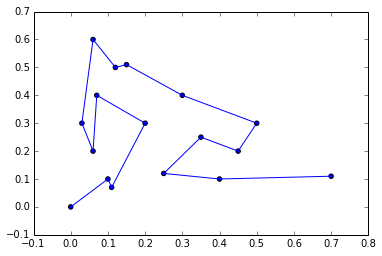

In [18]:
orgpoints = np.array([[0, 0],[0.1, 0.1],[0.11,0.07],[0.2,0.3],[0.07,0.4],[0.06,0.2], [0.03,0.3], [0.06,0.6],[0.12,0.5],[0.15,0.51],[0.3,0.4],[0.5,0.3],[0.45,0.2],[0.35,0.25],[0.25,0.12], [0.4,0.1], [0.7,0.11] ])
#print(orgpoints[:,0])
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.show()


## Simplify points - Left to Right

Now we'll simplify the 17 points by 1/3 (roughly, 17 doesn't divide evenly into 1/3 so we'll need to acount for cases where the reduction of points is not a factor of the original number of points). We will average points from left to right and examine the result.


[0.0, 0.1, 0.11, 0.2, 0.07, 0.06, 0.03, 0.06, 0.12, 0.15, 0.3, 0.5, 0.45, 0.35, 0.25, 0.4, 0.7]


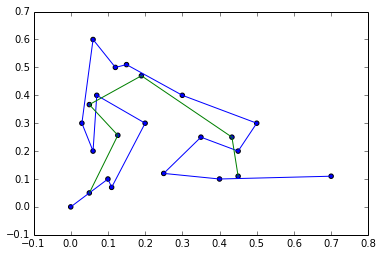

In [123]:
#Get the original points into lists which will act like point stacks
xs = orgpoints[:,0].tolist()
ys = orgpoints[:,1].tolist()
#mean lists will hold the mean averaged points
meanxsLR = []
meanysLR = []
#lets look at the Xs to see we got everything
print(xs)
#pr is the point reduction - '3' is reducing every 3 points to 1 or 1/3 of the points
pr = 3
while xs:
    temp = []
    for i in range(pr):
        if xs:
            temp.append(xs.pop())
    xmean = sum(temp)/len(temp)
    meanxsLR.append(xmean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

while ys:
    temp = []
    for i in range(pr):
        if ys:
            temp.append(ys.pop())
    ymean = sum(temp)/len(temp)
    meanysLR.append(ymean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

#lets plot the average on top of the original to see the changes
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.scatter(meanxsLR,meanysLR)
plt.plot(meanxsLR,meanysLR)
plt.show()

## Simplify points - Right to Left (reverse)

We will now average points from right to left and compare the result to the previous result.

[0.7, 0.4, 0.25, 0.35, 0.45, 0.5, 0.3, 0.15, 0.12, 0.06, 0.03, 0.06, 0.07, 0.2, 0.11, 0.1, 0.0]


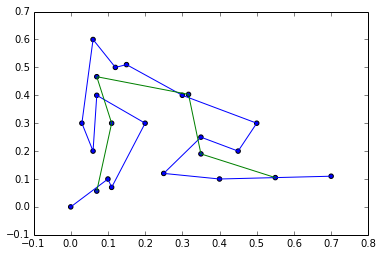

In [122]:
#Now  lets try averaging in the opposite direction
xs = orgpoints[:,0].tolist()
ys = orgpoints[:,1].tolist()
#This time lets reverse the lists to see if the direction we choose to average in makes a difference
xs.reverse()
ys.reverse()
#mean lists will hold the mean averaged points
meanxsRL = []
meanysRL = []
#lets look at the Xs to see we got everything
print(xs)
#pr is the point reduction - '3' is reducing every 3 points to 1 or 1/3 of the points
pr = 3
while xs:
    temp = []
    for i in range(pr):
        if xs:
            temp.append(xs.pop())
    xmean = sum(temp)/len(temp)
    meanxsRL.append(xmean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

while ys:
    temp = []
    for i in range(pr):
        if ys:
            temp.append(ys.pop())
    ymean = sum(temp)/len(temp)
    meanysRL.append(ymean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

#lets plot the average on top of the original to see the changes
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.scatter(meanxsRL,meanysRL)
plt.plot(meanxsRL,meanysRL)
plt.show()

## Comparing Left to Right vs Right to Left

Lets plot Left Right, Right Left, and the original graph and see the difference

- Original = Blue
- Left to Right = Green 
- Right to Left = Red

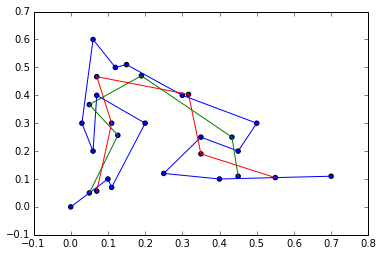

In [124]:
#original in blue
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
#Left to Right in Green
plt.scatter(meanxsLR,meanysLR)
plt.plot(meanxsLR,meanysLR)
#Right to Left in Red
plt.scatter(meanxsRL,meanysRL)
plt.plot(meanxsRL,meanysRL)
plt.show()

## Feature loss and distortion

As you can see above the "averaged" graph doesn't retain any of the features of the original (the points are inset, or "shrunk-in", from the original data set). So how do we keep the original features, but reduce the number of points? This is where the skeletal relaxation method discussed in articles above comes into effect. 

## Voronoi

Below is the Voronoi of our graph

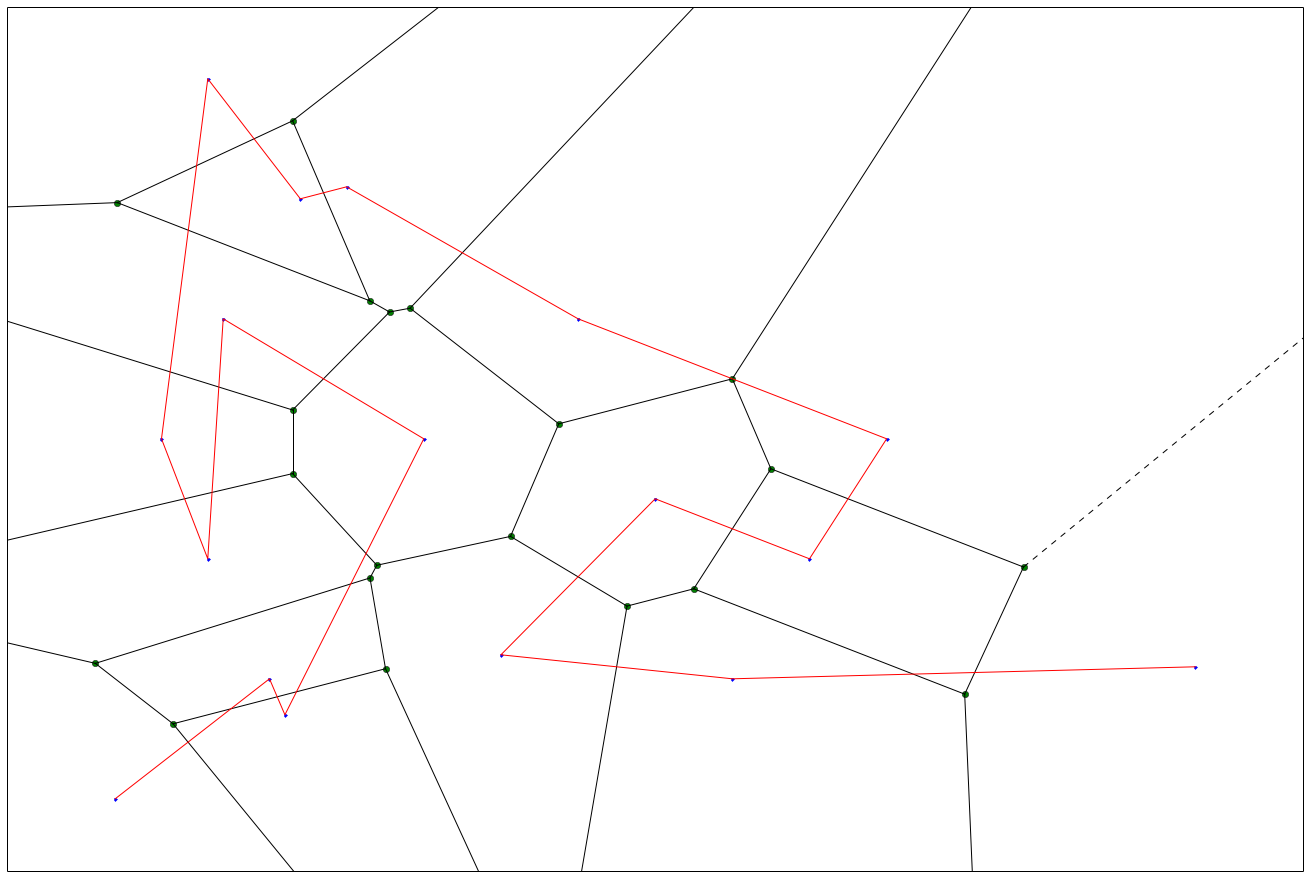

In [186]:
ax = plt.axes([0, 0, 3, 3], frame_on=True, xticks=[], yticks=[])
vor = Voronoi(orgpoints)
voronoi_plot_2d(vor,ax=ax)
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.show()

## Delaunay

Below is the Delaunay Triagulation of our graph

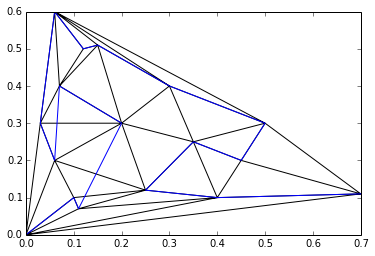

In [140]:
tri = Delaunay(orgpoints)
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.triplot(orgpoints[:,0], orgpoints[:,1], tri.simplices.copy())
plt.show()

## Voronoi and Delaunay combined

Here are all three plots: Our original graph, the Voronoi of our graph, and our Delaunay trigulation of our graph

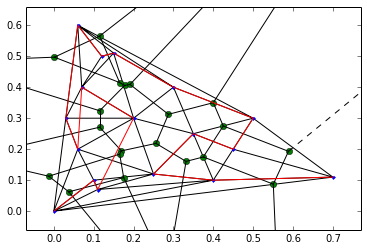

In [145]:
vor = Voronoi(orgpoints)
voronoi_plot_2d(vor)
tri = Delaunay(orgpoints)
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.triplot(orgpoints[:,0], orgpoints[:,1], tri.simplices.copy())
plt.show()

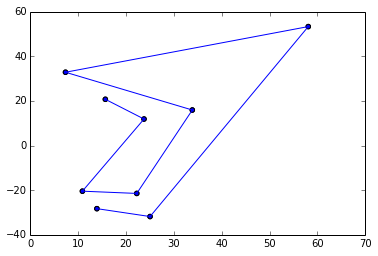

In [146]:
#morepoints = np.array([[13.889598,-28.28427],[13.889597,-28.28427],[25.001275,-31.8198],[25.001276,-31.81981],[58.08377,53.28555],[58.08377,53.28554],[-32.82995,31.31473],[-32.82996,31.31473],[-35.1028,10.6066],[-35.102804,10.6066],[-17.930208,29.04189],[-17.930208,29.04189],[7.323606,32.82996],[7.323606,32.82995],[33.840108,15.90989],[33.84011,15.90989],[22.22335,-21.46573],[22.22336,-21.46573],[0,0],[-6.69226,-9.97525],[-13.76333,-19.95051],[-7.07107,-9.97525],[-14.52094,-19.95051],[-16.03617,-19.95051],[-1.51523,0],[-10.85914,-6.56599],[-19.82424,-13.13198],[-8.9651,-6.566],[-17.5514,-13.13199],[-17.5514,-13.13199],[9.84899,-14.89975],[9.84899,-14.89975],[31.31472,3.03046],[31.31473,3.03046],[36.61803,7.32361],[36.61803,7.3236],[16.16244,-10.85914],[16.16244,-10.85914],[-11.36422,-15.9099],[-11.36421,-15.90991],[-34.85026,6.566],[-34.85026,6.56599],[-7.32361,-6.56599],[-7.32361,-6.566],[7.57614,-11.11167],[7.57615,-11.11168],[0,0],[7.95495,-4.16688],[16.98319,-7.95495],[9.02824,-3.78807],[19.12976,-7.19734],[23.42291,-5.68211],[4.29315,1.51523],[23.10724,8.33376],[40.84805,14.77348],[17.7408,6.43973],[34.40832,12.50064],[34.40832,12.50064],[18.68782,10.85914],[18.68782,10.85914],[30.55711,-24.24366],[30.55712,-24.24367],[7.57614,-44.69925],[7.57615,-44.69925],[-22.72843,-26.76904],[-22.72843,-26.76904],[-51.51778,-8.58629],[-51.51778,-8.5863],[-24.4962,14.14214],[-24.4962,14.14213],[1.76776,21.2132],[1.76777,21.2132],[23.73859,15.65737],[23.73858,15.65736],[31.8198,-7.57614],[31.81981,-7.57614],[-6.31346,-23.23351],[-6.31345,-23.23351],[23.23351,12.87945],[23.23351,12.87944],[9.34391,32.07234],[9.34391,32.07234],[-24.74874,16.66752],[-24.74873,16.66752],[-40.15357,-12.62691],[-40.15356,-12.62691],[-21.46574,-18.18274],[-21.46574,-18.18275],[-17.1726,-39.39595],[-17.17259,-39.39595],[7.82868,-18.94036],[7.82869,-18.94036],[0,0],[22.09708,-2.14657],[44.50984,-4.41941],[22.41276,-2.27285],[45.1412,-4.67196],[46.40389,-5.17704],[1.26269,-0.50508],[23.86485,-2.27284],[46.15134,-3.91434],[22.28649,-1.64149],[44.25731,-3.15672],[44.25731,-3.15672],[49.24493,26.5165],[49.24494,26.51651],[26.51651,44.44671],[26.5165,44.44671],[-20.20305,41.16372],[-20.20305,41.16371],[-57.32616,15.65737],[-57.32616,15.65736],[-3.53553,16.16244],[-3.53553,16.16244],[10.10152,17.67767],[10.10153,17.67767],[38.89087,11.11168],[38.89087,11.11168],[4.29315,-10.35406],[4.29315,-10.35407],[-21.21321,-4.79822],[-21.2132,-4.79823],[-4.29315,-17.17259],[-4.29314,-17.1726],[23.99112,-9.59644],[23.99112,-9.59645],[23.23351,3.283],[23.23351,3.28299],[29.04188,-26.01143],[29.04189,-26.01143],[7.3236,-46.71956],[7.32361,-46.71955],[-33.0825,-33.33503],[-33.08249,-33.33504],[10.85914,-20.45558],[10.85914,-20.45559],[23.73858,11.86929],[23.73859,11.86929],[15.65736,20.70812],[15.65737,20.70813]])
morepoints = np.array([[13.889598,-28.28427],[13.889597,-28.28427],[25.001275,-31.8198],[25.001276,-31.81981],[58.08377,53.28555],[58.08377,53.28554],[7.323606,32.82996],[7.323606,32.82995],[33.840108,15.90989],[33.84011,15.90989],[22.22335,-21.46573],[22.22336,-21.46573],[10.85914,-20.45558],[10.85914,-20.45559],[23.73858,11.86929],[23.73859,11.86929],[15.65736,20.70812],[15.65737,20.70813]])
plt.scatter(morepoints[:,0],morepoints[:,1])
plt.plot(morepoints[:,0],morepoints[:,1])
plt.show()

# Leaf Example

[Leaf Image Source](http://pngimg.com/uploads/green_leaves/green_leaves_PNG3678.png)

[Leaf 1](http://stackoverflow.com/questions/13623301/convert-contour-matplotlib-or-opencv-to-image-of-the-same-size-as-the-original/13623960#13623960)

[Leaf 2](http://stackoverflow.com/questions/13586686/extract-external-contour-or-silhouette-of-image-in-python)

[getting contour segments](http://stackoverflow.com/questions/1560424/how-can-i-get-the-x-y-values-of-the-line-that-is-ploted-by-a-contour-plot-mat)

In [162]:
from PIL import Image
from pylab import *
im = np.array(Image.open('green_leaves_PNG3678.png').convert('L'))

xpixels = im.shape[1]
ypixels = im.shape[0]

dpi = 72
scalefactor = 1

xinch = xpixels * scalefactor / dpi
yinch = ypixels * scalefactor / dpi

fig = plt.figure(figsize=(xinch,yinch))

ax = plt.axes([0, 0, 1, 1], frame_on=False, xticks=[], yticks=[])

#contour(im, levels=[240], colors='black', origin='image', linewidths=[3])
contour(im, levels=[245], colors='black', origin='image')


plt.savefig('same_size.png', dpi=dpi, transparent=True)
fig.clf()
plt.close(fig)



(1200, 1600, 4)
(1200, 1600)


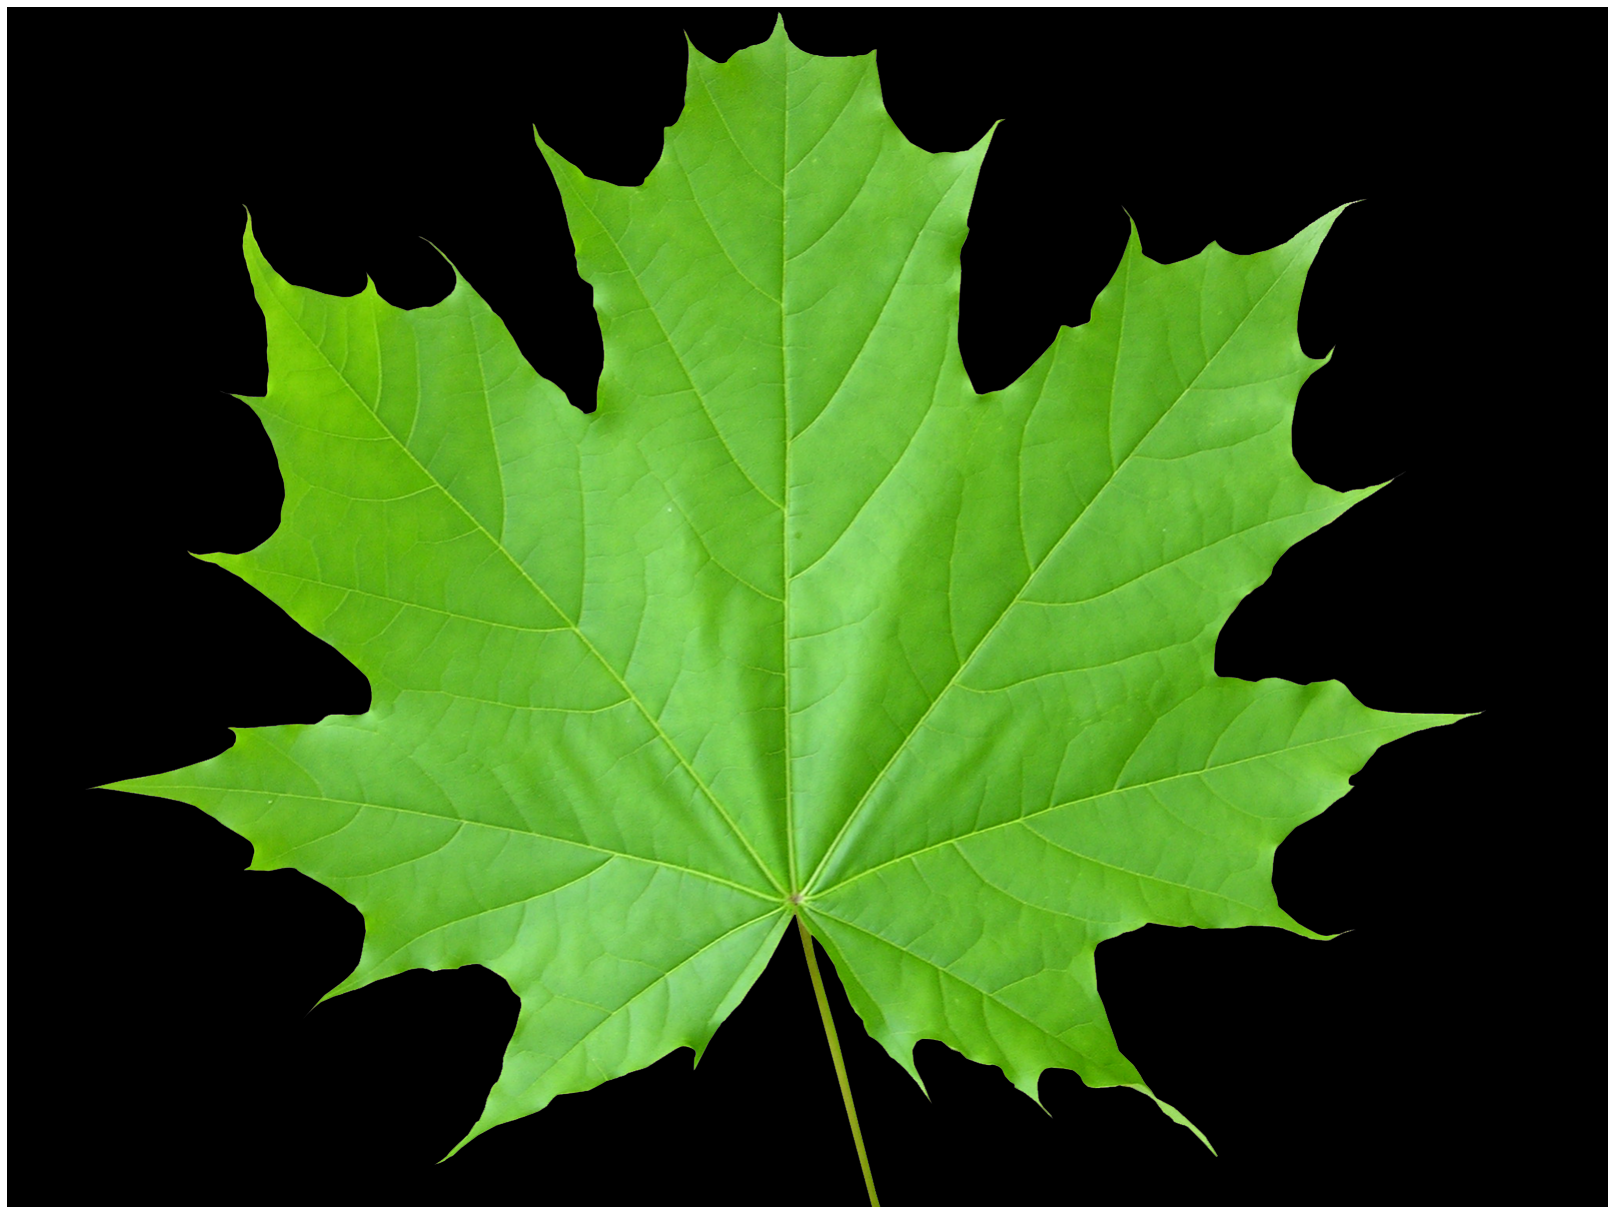

In [163]:
from PIL import Image

im_orig = np.array(Image.open('green_leaves_PNG3678.png'))
im_cnt = np.array(Image.open('same_size.png').convert('L'))

print(im_orig.shape)
print(im_cnt.shape)
#print('Original dimensions: %s ' % (im_orig.shape))
#print('Contour dimensions: %s' % (im_orig.shape))

xpixels = im_orig.shape[1]
ypixels = im_orig.shape[0]

dpi = 72
scalefactor = 1

xinch = xpixels * scalefactor / dpi
yinch = ypixels * scalefactor / dpi

fig = plt.figure(figsize=(xinch,yinch))

ax = plt.axes([0, 0, 1, 1], frame_on=False, xticks=[], yticks=[])

ax.imshow(im_orig)
ax.imshow(np.ma.masked_equal(im_cnt, 255), cmap=plt.cm.Greys_r)
ax.imshow(im_orig)

plt.savefig('overlay2.png', dpi=dpi, transparent=True)

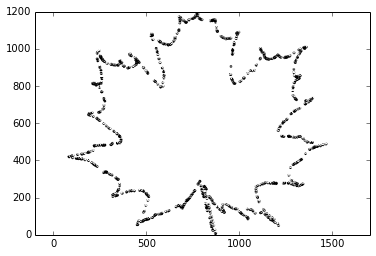

[array([[  770.5       ,  1195.51606426],
       [  770.59756098,  1195.5       ],
       [  770.5       ,  1195.40243902],
       [  770.48393574,  1195.5       ],
       [  770.5       ,  1195.51606426]]), array([[  772.5       ,  1195.53921569],
       [  772.53921569,  1195.5       ],
       [  772.5       ,  1195.46078431],
       [  772.28723404,  1195.5       ],
       [  772.5       ,  1195.53921569]]), array([[  774.5       ,  1191.53030303],
       [  774.51209677,  1191.5       ],
       [  774.5       ,  1191.43617021],
       [  774.46103896,  1191.5       ],
       [  774.5       ,  1191.53030303]]), array([[  769.5       ,  1189.56622517],
       [  769.62048193,  1189.5       ],
       [  769.59638554,  1188.5       ],
       [  769.5       ,  1188.36885246],
       [  769.46837945,  1188.5       ],
       [  769.46078431,  1189.5       ],
       [  769.5       ,  1189.56622517]]), array([[  777.5       ,  1187.53921569],
       [  777.53921569,  1187.5       ],
       

In [180]:
# read image to array
im = array(Image.open('green_leaves_PNG3678.png').convert('L'))

# create a new figure
figure()

# show contours with origin upper left corner
cs = contour(im, levels=[245], colors='black', origin='image', linewidths=[3])
axis('equal')

show()
print(cs.collections[0].get_segments())#.get_array())#.get_segments())#print(cs.collections[0].get_paths())

In [181]:
maplepoints = [[  770.5       ,  1195.51606426],       [  770.59756098,  1195.5       ],       [  770.5       ,  1195.40243902],       [  770.48393574,  1195.5       ],       [  770.5       ,  1195.51606426],[  772.5       ,  1195.53921569],       [  772.53921569,  1195.5       ],       [  772.5       ,  1195.46078431],       [  772.28723404,  1195.5       ],       [  772.5       ,  1195.53921569],[  774.5       ,  1191.53030303],       [  774.51209677,  1191.5       ],       [  774.5       ,  1191.43617021],       [  774.46103896,  1191.5       ],       [  774.5       ,  1191.53030303],[  769.5       ,  1189.56622517],       [  769.62048193,  1189.5       ],       [  769.59638554,  1188.5       ],       [  769.5       ,  1188.36885246],       [  769.46837945,  1188.5       ],       [  769.46078431,  1189.5       ],       [  769.5       ,  1189.56622517],[  777.5       ,  1187.53921569],       [  777.53921569,  1187.5       ],       [  777.5       ,  1187.40566038],       [  777.46078431,  1187.5       ],       [  777.5       ,  1187.53921569],[  766.5       ,  1180.53921569],       [  766.63333333,  1180.5       ],       [  766.5       ,  1180.27272727],       [  766.16666667,  1180.5       ],       [  766.5       ,  1180.53921569],[  777.5       ,  1178.51492537],       [  777.50406504,  1178.5       ],       [  777.5       ,  1178.47777778],       [  777.48717949,  1178.5       ],       [  777.5       ,  1178.51492537],[  765.5       ,  1177.55681818],       [  765.62195122,  1177.5       ],       [  765.5       ,  1177.25609756],       [  765.46078431,  1177.5       ],       [  765.5       ,  1177.55681818],[  676.5       ,  1172.53225806],       [  676.52439024,  1172.5       ],       [  676.5       ,  1172.49082569],       [  676.49190283,  1172.5       ],       [  676.5       ,  1172.53225806],[  762.5       ,  1171.53921569],       [  762.65625   ,  1171.5       ],       [  762.5       ,  1171.12962963],       [  762.44475138,  1171.5       ],       [  762.5       ,  1171.53921569],[  761.5       ,  1170.55524862],       [  761.87037037,  1170.5       ],       [  761.5       ,  1170.43377483],       [  761.46078431,  1170.5       ],       [  761.5       ,  1170.55524862],[  682.5       ,  1168.53921569],       [  682.56410256,  1168.5       ],       [  682.5       ,  1168.45575221],       [  682.37951807,  1168.5       ],       [  682.5       ,  1168.53921569],[  783.5       ,  1166.55524862],       [  783.59433962,  1166.5       ],       [  783.5       ,  1166.27272727],       [  783.31481481,  1166.5       ],       [  783.5       ,  1166.55524862],[  753.5       ,  1165.53921569],       [  753.55524862,  1165.5       ],       [  753.5       ,  1165.46078431],       [  753.46078431,  1165.5       ],       [  753.5       ,  1165.53921569],[  750.5       ,  1164.53921569],       [  751.16666667,  1164.5       ],       [  750.5       ,  1164.46078431],       [  750.46078431,  1164.5       ],       [  750.5       ,  1164.53921569],[  786.5       ,  1164.53921569],       [  786.53921569,  1164.5       ],       [  786.5       ,  1164.46078431],       [  786.46078431,  1164.5       ],       [  786.5       ,  1164.53921569],[  677.5       ,  1163.5952381 ],       [  677.53921569,  1163.5       ],       [  677.5       ,  1163.45575221],       [  677.46078431,  1163.5       ],       [  677.5       ,  1163.5952381 ],[  685.5       ,  1163.57407407],       [  685.68867925,  1163.5       ],       [  685.53162055,  1162.5       ],       [  685.5       ,  1162.42380952],       [  685.42156863,  1162.5       ],       [  685.37341772,  1163.5       ],       [  685.5       ,  1163.57407407],[  745.5       ,  1163.53921569],       [  745.68867925,  1163.5       ],       [  745.5       ,  1163.46078431],       [  745.46078431,  1163.5       ],       [  745.5       ,  1163.53921569],[  785.5       ,  1163.53921569],       [  785.53921569,  1163.5       ],       [  785.5       ,  1163.37654321],       [  785.36111111,  1163.5       ],       [  785.5       ,  1163.53921569],[  789.5       ,  1160.51606426],       [  789.52285714,  1160.5       ],       [  789.5       ,  1160.42857143],       [  789.37878788,  1160.5       ],       [  789.5       ,  1160.51606426],[  792.5       ,  1159.53921569],       [  792.53921569,  1159.5       ],       [  792.5       ,  1159.46078431],       [  792.46078431,  1159.5       ],       [  792.5       ,  1159.53921569],[  863.5       ,  1157.53921569],       [  863.53921569,  1157.5       ],       [  863.5       ,  1157.46078431],       [  863.46078431,  1157.5       ],       [  863.5       ,  1157.53921569],[  868.5       ,  1157.53921569],       [  868.8125    ,  1157.5       ],       [  868.5       ,  1157.4       ],       [  868.45575221,  1157.5       ],       [  868.5       ,  1157.53921569],[  728.5       ,  1156.53921569],       [  728.53921569,  1156.5       ],       [  728.5       ,  1156.46078431],       [  728.46078431,  1156.5       ],       [  728.5       ,  1156.53921569],[  798.5       ,  1156.53921569],       [  798.53921569,  1156.5       ],       [  798.5       ,  1156.46078431],       [  798.41735537,  1156.5       ],       [  798.5       ,  1156.53921569],[  729.5       ,  1155.52      ],       [  729.57042254,  1155.5       ],       [  729.5       ,  1155.44444444],       [  729.48      ,  1155.5       ],       [  729.5       ,  1155.52      ],[  863.5       ,  1155.53162055],       [  863.58602151,  1155.5       ],       [  863.5       ,  1155.41578947],       [  863.46837945,  1155.5       ],       [  863.5       ,  1155.53162055],[  696.5       ,  1154.53921569],       [  696.53921569,  1154.5       ],       [  696.5       ,  1154.46078431],       [  696.42307692,  1154.5       ],       [  696.5       ,  1154.53921569],[  852.5       ,  1153.53921569],       [  853.5       ,  1153.53921569],       [  854.5       ,  1153.53921569],       [  855.5       ,  1153.53921569],       [  856.5       ,  1153.53921569],       [  856.61363636,  1153.5       ],       [  856.5       ,  1153.46078431],       [  855.5       ,  1153.46078431],       [  854.5       ,  1153.46078431],       [  853.5       ,  1153.46078431],       [  852.5       ,  1153.46078431],       [  852.36842105,  1153.5       ],       [  852.5       ,  1153.53921569],[  871.5       ,  1153.5       ],       [  871.53921569,  1152.5       ],       [  871.5       ,  1152.4122807 ],       [  871.46078431,  1152.5       ],       [  871.5       ,  1153.5       ],[  680.5       ,  1152.38888889],       [  680.59756098,  1151.5       ],       [  680.56666667,  1150.5       ],       [  680.5       ,  1150.16666667],       [  680.48      ,  1150.5       ],       [  680.46837945,  1151.5       ],       [  680.5       ,  1152.38888889],[  853.5       ,  1151.50406504],       [  854.5       ,  1151.50809717],       [  855.5       ,  1151.51209677],       [  855.625     ,  1151.5       ],       [  855.5       ,  1151.47115385],       [  854.5       ,  1151.48076923],       [  853.5       ,  1151.49047619],       [  853.40909091,  1151.5       ],       [  853.5       ,  1151.50406504],[  702.5       ,  1150.53921569],       [  702.53921569,  1150.5       ],       [  702.5       ,  1150.46078431],       [  702.46078431,  1150.5       ],       [  702.5       ,  1150.53921569],[  844.5       ,  1150.53921569],       [  844.54424779,  1150.5       ],       [  844.5       ,  1150.4009901 ],       [  844.1875    ,  1150.5       ],       [  844.5       ,  1150.53921569],[  869.5       ,  1149.83333333],       [  869.51209677,  1149.5       ],       [  869.5       ,  1149.45      ],       [  869.47272727,  1149.5       ],       [  869.5       ,  1149.83333333],[  709.5       ,  1144.53921569],       [  709.53921569,  1144.5       ],       [  709.5       ,  1144.40909091],       [  709.34615385,  1144.5       ],       [  709.5       ,  1144.53921569],[  711.5       ,  1143.51209677],       [  711.63043478,  1143.5       ],       [  711.5       ,  1143.47413793],       [  711.45774648,  1143.5       ],       [  711.5       ,  1143.51209677],[  713.5       ,  1143.53921569],       [  713.57936508,  1143.5       ],       [  713.5       ,  1143.41735537],       [  713.16666667,  1143.5       ],       [  713.5       ,  1143.53921569],[  715.5       ,  1143.53921569],       [  715.8030303 ,  1143.5       ],       [  715.5       ,  1143.41071429],       [  715.42063492,  1143.5       ],       [  715.5       ,  1143.53921569],[  871.5       ,  1143.53921569],       [  871.53921569,  1143.5       ],       [  871.5       ,  1143.42248062],       [  871.46078431,  1143.5       ],       [  871.5       ,  1143.53921569],[  679.5       ,  1139.5472973 ],       [  679.59859155,  1139.5       ],       [  679.5       ,  1139.3372093 ],       [  679.47222222,  1139.5       ],       [  679.5       ,  1139.5472973 ],[  876.5       ,  1116.53921569],       [  876.53921569,  1116.5       ],       [  876.5       ,  1116.35294118],       [  876.46078431,  1116.5       ],       [  876.5       ,  1116.53921569],[  674.5       ,  1106.62658228],       [  674.53921569,  1106.5       ],       [  674.53921569,  1105.5       ],       [  674.53921569,  1104.5       ],       [  674.5       ,  1104.45575221],       [  674.46078431,  1104.5       ],       [  674.46078431,  1105.5       ],       [  674.46078431,  1106.5       ],       [  674.5       ,  1106.62658228],[  878.5       ,  1099.53921569],       [  878.53921569,  1099.5       ],       [  878.5       ,  1099.46078431],       [  878.27777778,  1099.5       ],       [  878.5       ,  1099.53921569],[  674.5       ,  1097.53921569],       [  674.66949153,  1097.5       ],       [  674.5       ,  1097.46078431],       [  674.375     ,  1097.5       ],       [  674.5       ,  1097.53921569],[  881.5       ,  1095.53921569],       [  881.53921569,  1095.5       ],       [  881.5       ,  1095.42      ],       [  881.40566038,  1095.5       ],       [  881.5       ,  1095.53921569],[  881.5       ,  1093.58      ],       [  881.68867925,  1093.5       ],       [  881.5       ,  1093.45575221],       [  881.31481481,  1093.5       ],       [  881.5       ,  1093.58      ],[  995.5       ,  1089.53921569],       [  996.5       ,  1089.53921569],       [  996.62820513,  1089.5       ],       [  996.5       ,  1089.46078431],       [  995.5       ,  1089.46078431],       [  995.46078431,  1089.5       ],       [  995.5       ,  1089.53921569],[  990.5       ,  1088.53921569],       [  990.73809524,  1088.5       ],       [  990.5       ,  1088.46078431],       [  990.46078431,  1088.5       ],       [  990.5       ,  1088.53921569],[  986.5       ,  1085.53921569],       [  986.69607843,  1085.5       ],       [  986.5       ,  1085.46078431],       [  986.46078431,  1085.5       ],       [  986.5       ,  1085.53921569],[  665.5       ,  1083.53921569],       [  665.59433962,  1083.5       ],       [  665.5       ,  1083.46078431],       [  665.46078431,  1083.5       ],       [  665.5       ,  1083.53921569],[  985.5       ,  1082.59433962],       [  985.71276596,  1082.5       ],       [  985.5       ,  1082.28723404],       [  985.39473684,  1082.5       ],       [  985.5       ,  1082.59433962],[  528.5       ,  1081.53921569],       [  528.57692308,  1081.5       ],       [  528.5       ,  1081.4       ],       [  528.39010989,  1081.5       ],       [  528.5       ,  1081.53921569],[  990.5       ,  1078.53921569],       [  990.53921569,  1078.5       ],       [  990.5       ,  1078.46078431],       [  990.39583333,  1078.5       ],       [  990.5       ,  1078.53921569],[  531.5       ,  1077.53921569],       [  531.53921569,  1077.5       ],       [  531.5       ,  1077.38636364],       [  531.46078431,  1077.5       ],       [  531.5       ,  1077.53921569],[  532.5       ,  1075.53921569],       [  532.53921569,  1075.5       ],       [  532.5       ,  1075.42592593],       [  532.44475138,  1075.5       ],       [  532.5       ,  1075.53921569],[  532.5       ,  1072.53921569],       [  532.57692308,  1072.5       ],       [  532.5       ,  1072.46078431],       [  532.39690722,  1072.5       ],       [  532.5       ,  1072.53921569],[  524.5       ,  1070.77777778],       [  524.53921569,  1070.5       ],       [  524.5       ,  1070.45575221],       [  524.46078431,  1070.5       ],       [  524.5       ,  1070.77777778],[  526.5       ,  1070.58333333],       [  526.54597701,  1070.5       ],       [  526.5       ,  1070.47037037],       [  526.48393574,  1070.5       ],       [  526.5       ,  1070.58333333],[  901.5       ,  1068.53921569],       [  901.53921569,  1068.5       ],       [  901.5       ,  1068.46078431],       [  901.46078431,  1068.5       ],       [  901.5       ,  1068.53921569],[  984.5       ,  1065.6754386 ],       [  984.57692308,  1065.5       ],       [  984.5       ,  1065.46078431],       [  984.36111111,  1065.5       ],       [  984.5       ,  1065.6754386 ],[  906.5       ,  1064.53921569],       [  906.53921569,  1064.5       ],       [  906.5       ,  1064.46078431],       [  906.375     ,  1064.5       ],       [  906.5       ,  1064.53921569],[  653.5       ,  1060.53921569],       [  653.53921569,  1060.5       ],       [  653.5       ,  1060.27777778],       [  653.46078431,  1060.5       ],       [  653.5       ,  1060.53921569],[  655.5       ,  1060.51111111],       [  655.52941176,  1060.5       ],       [  655.5       ,  1060.46153846],       [  655.49190283,  1060.5       ],       [  655.5       ,  1060.51111111],[  910.5       ,  1060.52390438],       [  910.52390438,  1060.5       ],       [  910.5       ,  1060.425     ],       [  910.40322581,  1060.5       ],       [  910.5       ,  1060.52390438],[  917.5       ,  1058.53921569],       [  917.53921569,  1058.5       ],       [  917.5       ,  1058.46078431],       [  917.44475138,  1058.5       ],       [  917.5       ,  1058.53921569],[  953.5       ,  1057.53921569],       [  953.60526316,  1057.5       ],       [  953.5       ,  1057.46078431],       [  953.46078431,  1057.5       ],       [  953.5       ,  1057.53921569],[  934.5       ,  1056.53921569],       [  934.68867925,  1056.5       ],       [  934.5       ,  1056.46078431],       [  934.46078431,  1056.5       ],       [  934.5       ,  1056.53921569],[  940.5       ,  1056.53921569],       [  940.53921569,  1056.5       ],       [  940.5       ,  1056.46078431],       [  940.31132075,  1056.5       ],       [  940.5       ,  1056.53921569],[  948.5       ,  1056.53921569],       [  948.72222222,  1056.5       ],       [  948.5       ,  1056.46078431],       [  948.46078431,  1056.5       ],       [  948.5       ,  1056.53921569],[  982.5       ,  1055.59433962],       [  982.53921569,  1055.5       ],       [  982.5       ,  1055.46078431],       [  982.46078431,  1055.5       ],       [  982.5       ,  1055.59433962],[  653.5       ,  1053.53921569],       [  653.66129032,  1053.5       ],       [  653.5       ,  1053.27777778],       [  653.40566038,  1053.5       ],       [  653.5       ,  1053.53921569],[  927.5       ,  1053.53921569],       [  927.59708738,  1053.5       ],       [  927.5       ,  1053.39583333],       [  927.45260664,  1053.5       ],       [  927.5       ,  1053.53921569],[  534.5       ,  1049.53921569],       [  534.88461538,  1049.5       ],       [  534.5       ,  1049.46078431],       [  534.46078431,  1049.5       ],       [  534.5       ,  1049.53921569],[  567.5       ,  1043.53921569],       [  567.53921569,  1043.5       ],       [  567.5       ,  1043.46078431],       [  567.375     ,  1043.5       ],       [  567.5       ,  1043.53921569],[  647.5       ,  1043.53921569],       [  647.53921569,  1043.5       ],       [  647.5       ,  1043.44475138],       [  647.46078431,  1043.5       ],       [  647.5       ,  1043.53921569],[  645.5       ,  1040.53921569],       [  645.53921569,  1040.5       ],       [  645.5       ,  1040.4047619 ],       [  645.46078431,  1040.5       ],       [  645.5       ,  1040.53921569],[  572.5       ,  1039.53921569],       [  572.53921569,  1039.5       ],       [  572.5       ,  1039.46078431],       [  572.45145631,  1039.5       ],       [  572.5       ,  1039.53921569],[  573.5       ,  1038.53921569],       [  573.53921569,  1038.5       ],       [  573.5       ,  1038.46078431],       [  573.46078431,  1038.5       ],       [  573.5       ,  1038.53921569],[  574.5       ,  1037.53921569],       [  574.53921569,  1037.5       ],       [  574.5       ,  1037.35294118],       [  574.46078431,  1037.5       ],       [  574.5       ,  1037.53921569],[  573.5       ,  1036.53162055],       [  573.62121212,  1036.5       ],       [  573.5       ,  1036.38405797],       [  573.38405797,  1036.5       ],       [  573.5       ,  1036.53162055],[  972.5       ,  1033.65686275],       [  972.53162055,  1033.5       ],       [  972.5       ,  1033.46837945],       [  972.39473684,  1033.5       ],       [  972.5       ,  1033.65686275],[  588.5       ,  1029.53921569],       [  588.56666667,  1029.5       ],       [  588.5       ,  1029.46078431],       [  588.3989899 ,  1029.5       ],       [  588.5       ,  1029.53921569],[  593.5       ,  1028.53921569],       [  593.53921569,  1028.5       ],       [  593.5       ,  1028.46078431],       [  593.20588235,  1028.5       ],       [  593.5       ,  1028.53921569],[  635.5       ,  1028.53921569],       [  635.56666667,  1028.5       ],       [  635.5       ,  1028.46078431],       [  635.46078431,  1028.5       ],       [  635.5       ,  1028.53921569],[  593.5       ,  1026.53921569],       [  593.54739336,  1026.5       ],       [  593.5       ,  1026.3989899 ],       [  593.35507246,  1026.5       ],       [  593.5       ,  1026.53921569],[  603.5       ,  1025.53921569],       [  603.53921569,  1025.5       ],       [  603.5       ,  1025.46078431],       [  603.4137931 ,  1025.5       ],       [  603.5       ,  1025.53921569],[  972.5       ,  1025.59433962],       [  972.53921569,  1025.5       ],       [  972.5       ,  1025.46078431],       [  972.46078431,  1025.5       ],       [  972.5       ,  1025.59433962],[  617.5       ,  1022.53921569],       [  618.5       ,  1022.53921569],       [  619.5       ,  1022.53921569],       [  619.56666667,  1022.5       ],       [  619.5       ,  1022.46078431],       [  618.5       ,  1022.46078431],       [  617.5       ,  1022.46078431],       [  616.83333333,  1022.5       ],       [  617.5       ,  1022.53921569],[  629.5       ,  1022.53921569],       [  629.55952381,  1022.5       ],       [  629.5       ,  1022.46078431],       [  629.45575221,  1022.5       ],       [  629.5       ,  1022.53921569],[  969.5       ,  1021.51369863],       [  969.50406504,  1021.5       ],       [  969.5       ,  1021.49418605],       [  969.48780488,  1021.5       ],       [  969.5       ,  1021.51369863],[  617.5       ,  1020.51209677],       [  617.875     ,  1020.5       ],       [  617.5       ,  1020.45833333],       [  617.43478261,  1020.5       ],       [  617.5       ,  1020.51209677],[ 1358.5       ,  1009.53921569],       [ 1358.83333333,  1009.5       ],       [ 1358.5       ,  1009.46078431],       [ 1358.43006993,  1009.5       ],       [ 1358.5       ,  1009.53921569],[ 1351.5       ,  1008.53921569],       [ 1351.72222222,  1008.5       ],       [ 1351.5       ,  1008.46078431],       [ 1351.46078431,  1008.5       ],       [ 1351.5       ,  1008.53921569],[ 1347.5       ,  1007.53921569],       [ 1348.5       ,  1007.52      ],       [ 1348.83333333,  1007.5       ],       [ 1348.5       ,  1007.48      ],       [ 1347.5       ,  1007.46078431],       [ 1347.46078431,  1007.5       ],       [ 1347.5       ,  1007.53921569],[ 1346.5       ,  1006.51606426],       [ 1346.51606426,  1006.5       ],       [ 1346.5       ,  1006.48393574],       [ 1346.33333333,  1006.5       ],       [ 1346.5       ,  1006.51606426],[ 1348.5       ,  1005.52390438],       [ 1349.04545455,  1005.5       ],       [ 1348.52222222,  1004.5       ],       [ 1348.5       ,  1004.48347107],       [ 1348.1       ,  1004.5       ],       [ 1348.16666667,  1005.5       ],       [ 1348.5       ,  1005.52390438],[  552.5       ,  1003.70408163],       [  552.53921569,  1003.5       ],       [  552.5       ,  1003.46078431],       [  552.46078431,  1003.5       ],       [  552.5       ,  1003.70408163],[ 1351.5       ,  1003.57518797],       [ 1351.57575758,  1003.5       ],       [ 1351.5       ,  1003.46078431],       [ 1351.46078431,  1003.5       ],       [ 1351.5       ,  1003.57518797],[ 1112.5       ,  1002.53921569],       [ 1112.53921569,  1002.5       ],       [ 1112.5       ,  1002.12962963],       [ 1112.46078431,  1002.5       ],       [ 1112.5       ,  1002.53921569],[ 1349.5       ,  1002.56756757],       [ 1350.5       ,  1002.53921569],       [ 1350.53921569,  1002.5       ],       [ 1350.5       ,  1002.46078431],       [ 1349.5       ,  1002.46078431],       [ 1349.46078431,  1002.5       ],       [ 1349.5       ,  1002.56756757],[ 1326.5       ,   998.51606426],       [ 1327.5       ,   998.54950495],       [ 1327.67857143,   998.5       ],       [ 1327.5       ,   998.31481481],       [ 1326.5       ,   998.21428571],       [ 1326.48393574,   998.5       ],       [ 1326.5       ,   998.51606426],[ 1114.5       ,   997.69230769],       [ 1114.61363636,   997.5       ],       [ 1114.5       ,   997.46078431],       [ 1114.42307692,   997.5       ],       [ 1114.5       ,   997.69230769],[ 963.5       ,  996.63888889],       [ 963.53921569,  996.5       ],       [ 963.5       ,  996.46078431],       [ 963.32758621,  996.5       ],       [ 963.5       ,  996.63888889],[ 964.5       ,  994.72222222],       [ 964.53921569,  994.5       ],       [ 964.5       ,  994.45575221],       [ 964.46078431,  994.5       ],       [ 964.5       ,  994.72222222],[ 1320.5       ,   994.52      ],       [ 1320.67857143,   994.5       ],       [ 1320.5       ,   994.35294118],       [ 1320.27272727,   994.5       ],       [ 1320.5       ,   994.52      ],[ 962.5       ,  993.54761905],       [ 962.50809717,  993.5       ],       [ 962.5       ,  993.49190283],       [ 962.45555556,  993.5       ],       [ 962.5       ,  993.54761905],[ 1117.5       ,   993.52597403],       [ 1117.52247191,   993.5       ],       [ 1117.5       ,   993.49190283],       [ 1117.49190283,   993.5       ],       [ 1117.5       ,   993.52597403],[ 1116.5       ,   992.53921569],       [ 1116.53921569,   992.5       ],       [ 1116.5       ,   992.46078431],       [ 1116.46078431,   992.5       ],       [ 1116.5       ,   992.53921569],[ 963.5       ,  990.72222222],       [ 963.53921569,  990.5       ],       [ 963.5       ,  990.46078431],       [ 963.46078431,  990.5       ],       [ 963.5       ,  990.72222222],[ 246.5       ,  989.53921569],       [ 246.53921569,  989.5       ],       [ 246.5       ,  989.42753623],       [ 246.46078431,  989.5       ],       [ 246.5       ,  989.53921569],[ 1333.5       ,   989.53921569],       [ 1333.53921569,   989.5       ],       [ 1333.5       ,   989.46078431],       [ 1333.46078431,   989.5       ],       [ 1333.5       ,   989.53921569],[ 558.5       ,  988.68181818],       [ 558.6369863 ,  988.5       ],       [ 558.5       ,  988.45575221],       [ 558.46078431,  988.5       ],       [ 558.5       ,  988.68181818],[ 1328.5       ,   986.66129032],       [ 1328.52      ,   986.5       ],       [ 1328.5       ,   986.39583333],       [ 1328.37179487,   986.5       ],       [ 1328.5       ,   986.66129032],[ 557.5       ,  984.63888889],       [ 557.53921569,  984.5       ],       [ 557.5       ,  984.46078431],       [ 557.46078431,  984.5       ],       [ 557.5       ,  984.63888889],[ 1129.5       ,   983.53921569],       [ 1129.53921569,   983.5       ],       [ 1129.5       ,   983.42248062],       [ 1129.4382716 ,   983.5       ],       [ 1129.5       ,   983.53921569],[ 1120.5       ,   982.57692308],       [ 1120.53921569,   982.5       ],       [ 1120.5       ,   982.46078431],       [ 1120.46078431,   982.5       ],       [ 1120.5       ,   982.57692308],[ 236.5       ,  981.53921569],       [ 236.53921569,  981.5       ],       [ 236.5       ,  980.83333333],       [ 236.46078431,  981.5       ],       [ 236.5       ,  981.53921569],[ 1326.5       ,   980.53921569],       [ 1326.53921569,   980.5       ],       [ 1326.5       ,   980.46078431],       [ 1326.46078431,   980.5       ],       [ 1326.5       ,   980.53921569],[ 1293.5       ,   978.53921569],       [ 1293.53921569,   978.5       ],       [ 1293.5       ,   978.46078431],       [ 1293.46078431,   978.5       ],       [ 1293.5       ,   978.53921569],[ 235.5       ,  976.53921569],       [ 235.53921569,  976.5       ],       [ 235.5       ,  976.38095238],       [ 235.46078431,  976.5       ],       [ 235.5       ,  976.53921569],[ 964.5       ,  976.53921569],       [ 964.53921569,  976.5       ],       [ 964.5       ,  976.46078431],       [ 964.46078431,  976.5       ],       [ 964.5       ,  976.53921569],[ 1130.5       ,   974.52      ],       [ 1130.52      ,   974.5       ],       [ 1130.5       ,   974.43150685],       [ 1130.44623656,   974.5       ],       [ 1130.5       ,   974.52      ],[ 1132.5       ,   974.53921569],       [ 1132.53921569,   974.5       ],       [ 1132.5       ,   974.31481481],       [ 1132.46078431,   974.5       ],       [ 1132.5       ,   974.53921569],[ 961.5       ,  973.65384615],       [ 961.53921569,  973.5       ],       [ 961.5       ,  973.46078431],       [ 961.43150685,  973.5       ],       [ 961.5       ,  973.65384615],[ 410.5       ,  972.53921569],       [ 411.5       ,  972.53921569],       [ 412.5       ,  972.53921569],       [ 412.53921569,  972.5       ],       [ 412.5       ,  972.46078431],       [ 411.5       ,  972.46078431],       [ 410.5       ,  972.46078431],       [ 410.46078431,  972.5       ],       [ 410.5       ,  972.53921569],[ 1321.5       ,   972.53921569],       [ 1321.53921569,   972.5       ],       [ 1321.5       ,   972.46078431],       [ 1321.4047619 ,   972.5       ],       [ 1321.5       ,   972.53921569],[ 1131.5       ,   971.51818182],       [ 1131.51606426,   971.5       ],       [ 1131.5       ,   971.44117647],       [ 1131.44594595,   971.5       ],       [ 1131.5       ,   971.51818182],[ 962.5       ,  970.55524862],       [ 962.53921569,  970.5       ],       [ 962.5       ,  970.46078431],       [ 962.46078431,  970.5       ],       [ 962.5       ,  970.55524862],[ 561.5       ,  969.61904762],       [ 561.53921569,  969.5       ],       [ 561.5       ,  969.46078431],       [ 561.46078431,  969.5       ],       [ 561.5       ,  969.61904762],[ 1205.5       ,   967.53921569],       [ 1205.55952381,   967.5       ],       [ 1205.5       ,   967.46078431],       [ 1205.46078431,   967.5       ],       [ 1205.5       ,   967.53921569],[ 1208.5       ,   967.53921569],       [ 1208.53921569,   967.5       ],       [ 1208.5       ,   967.46078431],       [ 1208.46078431,   967.5       ],       [ 1208.5       ,   967.53921569],[ 411.5       ,  966.53921569],       [ 411.5617284 ,  966.5       ],       [ 411.5       ,  966.46078431],       [ 411.46078431,  966.5       ],       [ 411.5       ,  966.53921569],[ 1210.5       ,   965.53921569],       [ 1210.53921569,   965.5       ],       [ 1210.5       ,   965.43103448],       [ 1210.43006993,   965.5       ],       [ 1210.5       ,   965.53921569],[ 417.5       ,  963.53921569],       [ 417.5952381 ,  963.5       ],       [ 417.5       ,  963.46078431],       [ 417.46078431,  963.5       ],       [ 417.5       ,  963.53921569],[ 1133.5       ,   963.53921569],       [ 1133.57692308,   963.5       ],       [ 1133.5       ,   963.02380952],       [ 1133.38372093,   963.5       ],       [ 1133.5       ,   963.53921569],[ 419.5       ,  962.53921569],       [ 419.57692308,  962.5       ],       [ 419.5       ,  962.46078431],       [ 419.46078431,  962.5       ],       [ 419.5       ,  962.53921569],[ 1272.5       ,   962.53921569],       [ 1272.72727273,   962.5       ],       [ 1272.5       ,   962.27272727],       [ 1272.46078431,   962.5       ],       [ 1272.5       ,   962.53921569],[ 251.5       ,  961.53162055],       [ 251.53162055,  961.5       ],       [ 251.5       ,  961.34      ],       [ 251.38235294,  961.5       ],       [ 251.5       ,  961.53162055],[ 252.5       ,  960.53921569],       [ 252.72222222,  960.5       ],       [ 252.5       ,  960.1       ],       [ 252.30769231,  960.5       ],       [ 252.5       ,  960.53921569],[ 1196.5       ,   960.53921569],       [ 1196.53921569,   960.5       ],       [ 1196.5       ,   960.46078431],       [ 1196.46078431,   960.5       ],       [ 1196.5       ,   960.53921569],[ 1215.5       ,   960.53921569],       [ 1215.53921569,   960.5       ],       [ 1215.5       ,   960.46078431],       [ 1215.43006993,   960.5       ],       [ 1215.5       ,   960.53921569],[ 1267.5       ,   960.53921569],       [ 1267.8030303 ,   960.5       ],       [ 1267.5       ,   960.35074627],       [ 1267.46078431,   960.5       ],       [ 1267.5       ,   960.53921569],[ 254.5       ,  959.53921569],       [ 254.53921569,  959.5       ],       [ 254.5       ,  959.44475138],       [ 254.46078431,  959.5       ],       [ 254.5       ,  959.53921569],[ 1134.5       ,   959.53317536],       [ 1134.52777778,   959.5       ],       [ 1134.5       ,   959.42857143],       [ 1134.42553191,   959.5       ],       [ 1134.5       ,   959.53317536],[ 1258.5       ,   958.53921569],       [ 1258.64084507,   958.5       ],       [ 1258.5       ,   958.46078431],       [ 1258.46078431,   958.5       ],       [ 1258.5       ,   958.53921569],[ 1195.5       ,   957.53921569],       [ 1195.61494253,   957.5       ],       [ 1195.5       ,   957.38372093],       [ 1195.46078431,   957.5       ],       [ 1195.5       ,   957.53921569],[ 1217.5       ,   957.53921569],       [ 1217.53921569,   957.5       ],       [ 1217.5       ,   957.34615385],       [ 1217.31818182,   957.5       ],       [ 1217.5       ,   957.53921569],[ 1312.5       ,   957.83333333],       [ 1312.64705882,   957.5       ],       [ 1312.5       ,   957.46078431],       [ 1312.3245614 ,   957.5       ],       [ 1312.5       ,   957.83333333],[ 254.5       ,  956.53921569],       [ 254.59433962,  956.5       ],       [ 254.5       ,  956.46078431],       [ 254.2826087 ,  956.5       ],       [ 254.5       ,  956.53921569],[ 1250.5       ,   956.53921569],       [ 1250.60989011,   956.5       ],       [ 1250.5       ,   956.46078431],       [ 1250.46078431,   956.5       ],       [ 1250.5       ,   956.53921569],[ 1258.5       ,   956.51209677],       [ 1258.53370787,   956.5       ],       [ 1258.5       ,   956.46666667],       [ 1258.48630137,   956.5       ],       [ 1258.5       ,   956.51209677],[ 1246.5       ,   955.53921569],       [ 1246.57692308,   955.5       ],       [ 1246.5       ,   955.46078431],       [ 1246.46078431,   955.5       ],       [ 1246.5       ,   955.53921569],[ 1254.5       ,   955.53162055],       [ 1254.63559322,   955.5       ],       [ 1254.5       ,   955.41578947],       [ 1254.4558011 ,   955.5       ],       [ 1254.5       ,   955.53162055],[ 1135.5       ,   954.53921569],       [ 1136.5       ,   954.60204082],       [ 1136.53921569,   954.5       ],       [ 1136.5       ,   954.36486486],       [ 1135.5       ,   954.46078431],       [ 1135.32142857,   954.5       ],       [ 1135.5       ,   954.53921569],[ 1189.5       ,   954.53921569],       [ 1189.57692308,   954.5       ],       [ 1189.5       ,   954.46078431],       [ 1189.46078431,   954.5       ],       [ 1189.5       ,   954.53921569],[ 1223.5       ,   954.51209677],       [ 1223.51209677,   954.5       ],       [ 1223.5       ,   954.47115385],       [ 1223.46551724,   954.5       ],       [ 1223.5       ,   954.51209677],[ 1250.5       ,   954.53921569],       [ 1250.68518519,   954.5       ],       [ 1250.5       ,   954.40566038],       [ 1250.46078431,   954.5       ],       [ 1250.5       ,   954.53921569],[ 255.5       ,  953.53921569],       [ 255.57692308,  953.5       ],       [ 255.51606426,  952.5       ],       [ 255.5       ,  952.4245283 ],       [ 255.43333333,  952.5       ],       [ 255.29591837,  953.5       ],       [ 255.5       ,  953.53921569],[ 1187.5       ,   953.53921569],       [ 1187.59259259,   953.5       ],       [ 1187.5       ,   953.46078431],       [ 1187.46078431,   953.5       ],       [ 1187.5       ,   953.53921569],[ 1191.5       ,   953.51606426],       [ 1191.55633803,   953.5       ],       [ 1191.5       ,   953.44117647],       [ 1191.48393574,   953.5       ],       [ 1191.5       ,   953.51606426],[ 1311.5       ,   953.53921569],       [ 1311.53921569,   953.5       ],       [ 1311.5       ,   953.46078431],       [ 1311.38372093,   953.5       ],       [ 1311.5       ,   953.53921569],[ 438.5       ,  952.53921569],       [ 438.53921569,  952.5       ],       [ 438.5       ,  952.3       ],       [ 438.32758621,  952.5       ],       [ 438.5       ,  952.53921569],[ 1243.5       ,   952.53921569],       [ 1243.61764706,   952.5       ],       [ 1243.5       ,   952.40384615],       [ 1243.45575221,   952.5       ],       [ 1243.5       ,   952.53921569],[ 257.5       ,  951.83333333],       [ 257.53921569,  951.5       ],       [ 257.5       ,  951.46078431],       [ 257.45192308,  951.5       ],       [ 257.5       ,  951.83333333],[ 1140.5       ,   951.53921569],       [ 1140.53921569,   951.5       ],       [ 1140.5       ,   951.46078431],       [ 1140.42307692,   951.5       ],       [ 1140.5       ,   951.53921569],[ 1187.5       ,   951.50809717],       [ 1187.52469136,   951.5       ],       [ 1187.5       ,   951.47727273],       [ 1187.49190283,   951.5       ],       [ 1187.5       ,   951.50809717],[ 1113.5       ,   949.53921569],       [ 1113.5990099 ,   949.5       ],       [ 1113.5       ,   949.46078431],       [ 1113.44475138,   949.5       ],       [ 1113.5       ,   949.53921569],[ 1142.5       ,   948.51209677],       [ 1142.51209677,   948.5       ],       [ 1142.5       ,   948.47142857],       [ 1142.46511628,   948.5       ],       [ 1142.5       ,   948.51209677],[ 1148.5       ,   947.53921569],       [ 1148.53921569,   947.5       ],       [ 1148.5       ,   947.46078431],       [ 1148.44475138,   947.5       ],       [ 1148.5       ,   947.53921569],[ 1170.5       ,   947.53921569],       [ 1170.60204082,   947.5       ],       [ 1170.5       ,   947.46078431],       [ 1170.46078431,   947.5       ],       [ 1170.5       ,   947.53921569],[ 1177.5       ,   947.52      ],       [ 1177.5862069 ,   947.5       ],       [ 1177.5       ,   947.44047619],       [ 1177.48      ,   947.5       ],       [ 1177.5       ,   947.52      ],[ 235.5       ,  946.57751938],       [ 235.53921569,  946.5       ],       [ 235.5       ,  946.46078431],       [ 235.46078431,  946.5       ],       [ 235.5       ,  946.57751938],[ 261.5       ,  946.53921569],       [ 261.53921569,  946.5       ],       [ 261.5       ,  946.46078431],       [ 261.45575221,  946.5       ],       [ 261.5       ,  946.53921569],[ 443.5       ,  946.53921569],       [ 443.53921569,  946.5       ],       [ 443.5       ,  946.3245614 ],       [ 443.24358974,  946.5       ],       [ 443.5       ,  946.53921569],[ 567.5       ,  946.53921569],       [ 567.67241379,  946.5       ],       [ 567.5       ,  946.46078431],       [ 567.35294118,  946.5       ],       [ 567.5       ,  946.53921569],[ 1110.5       ,   945.53921569],       [ 1110.53921569,   945.5       ],       [ 1110.5       ,   945.44350282],       [ 1110.46078431,   945.5       ],       [ 1110.5       ,   945.53921569],[ 1148.5       ,   945.50809717],       [ 1148.50809717,   945.5       ],       [ 1148.5       ,   945.475     ],       [ 1148.46825397,   945.5       ],       [ 1148.5       ,   945.50809717],[ 1155.5       ,   944.53921569],       [ 1155.56666667,   944.5       ],       [ 1155.5       ,   944.46078431],       [ 1155.42307692,   944.5       ],       [ 1155.5       ,   944.53921569],[ 1159.5       ,   944.53921569],       [ 1159.58264463,   944.5       ],       [ 1159.5       ,   944.46078431],       [ 1159.43333333,   944.5       ],       [ 1159.5       ,   944.53921569],[ 236.5       ,  943.68181818],       [ 236.53921569,  943.5       ],       [ 236.5       ,  943.46078431],       [ 236.46078431,  943.5       ],       [ 236.5       ,  943.68181818],[ 262.5       ,  943.53921569],       [ 262.83333333,  943.5       ],       [ 262.5       ,  943.35074627],       [ 262.33050847,  943.5       ],       [ 262.5       ,  943.53921569],[ 448.5       ,  942.53921569],       [ 448.53921569,  942.5       ],       [ 448.5       ,  942.46078431],       [ 448.46078431,  942.5       ],       [ 448.5       ,  942.53921569],[ 443.5       ,  940.63888889],       [ 443.62195122,  940.5       ],       [ 443.5       ,  940.46078431],       [ 443.46078431,  940.5       ],       [ 443.5       ,  940.63888889],[ 1303.5       ,   939.76315789],       [ 1303.53921569,   939.5       ],       [ 1303.5       ,   939.46078431],       [ 1303.35294118,   939.5       ],       [ 1303.5       ,   939.76315789],[ 266.5       ,  938.53921569],       [ 266.63888889,  938.5       ],       [ 266.5       ,  938.29166667],       [ 266.36486486,  938.5       ],       [ 266.5       ,  938.53921569],[ 444.5       ,  938.6754386 ],       [ 444.6369863 ,  938.5       ],       [ 444.5       ,  938.46078431],       [ 444.46078431,  938.5       ],       [ 444.5       ,  938.6754386 ],[ 450.5       ,  937.53921569],       [ 450.53921569,  937.5       ],       [ 450.5       ,  937.38372093],       [ 450.36666667,  937.5       ],       [ 450.5       ,  937.53921569],[ 267.5       ,  936.51606426],       [ 267.51606426,  936.5       ],       [ 267.5       ,  936.45180723],       [ 267.45454545,  936.5       ],       [ 267.5       ,  936.51606426],[ 238.5       ,  935.5952381 ],       [ 238.53921569,  935.5       ],       [ 238.5       ,  935.46078431],       [ 238.46078431,  935.5       ],       [ 238.5       ,  935.5952381 ],[ 358.5       ,  935.50809717],       [ 358.55882353,  935.5       ],       [ 358.5       ,  935.45652174],       [ 358.49190283,  935.5       ],       [ 358.5       ,  935.50809717],[ 361.5       ,  934.53921569],       [ 361.53921569,  934.5       ],       [ 361.5       ,  934.46078431],       [ 361.46078431,  934.5       ],       [ 361.5       ,  934.53921569],[ 446.5       ,  934.66666667],       [ 446.63157895,  934.5       ],       [ 446.5       ,  934.44680851],       [ 446.46078431,  934.5       ],       [ 446.5       ,  934.66666667],[ 356.5       ,  933.60989011],       [ 356.53921569,  933.5       ],       [ 356.5       ,  933.46078431],       [ 356.46078431,  933.5       ],       [ 356.5       ,  933.60989011],[ 273.5       ,  931.51209677],       [ 273.51209677,  931.5       ],       [ 273.5       ,  931.45081967],       [ 273.4516129 ,  931.5       ],       [ 273.5       ,  931.51209677],[ 275.5       ,  931.53921569],       [ 275.53921569,  931.5       ],       [ 275.5       ,  931.46078431],       [ 275.46078431,  931.5       ],       [ 275.5       ,  931.53921569],[ 455.5       ,  931.53921569],       [ 455.68867925,  931.5       ],       [ 455.5       ,  931.02380952],       [ 455.26744186,  931.5       ],       [ 455.5       ,  931.53921569],[ 457.5       ,  930.53921569],       [ 457.53921569,  930.5       ],       [ 457.5       ,  930.46078431],       [ 457.46078431,  930.5       ],       [ 457.5       ,  930.53921569],[ 359.5       ,  929.77777778],       [ 359.62658228,  929.5       ],       [ 359.5       ,  929.42063492],       [ 359.46078431,  929.5       ],       [ 359.5       ,  929.77777778],[ 458.5       ,  929.53921569],       [ 458.53921569,  929.5       ],       [ 458.5       ,  929.46078431],       [ 458.46078431,  929.5       ],       [ 458.5       ,  929.53921569],[ 1299.5       ,   929.59009009],       [ 1299.53921569,   929.5       ],       [ 1299.5       ,   929.45575221],       [ 1299.38372093,   929.5       ],       [ 1299.5       ,   929.59009009],[ 365.5       ,  926.53921569],       [ 365.56993007,  926.5       ],       [ 365.5       ,  926.37179487],       [ 365.36486486,  926.5       ],       [ 365.5       ,  926.53921569],[ 367.5       ,  926.53921569],       [ 367.53921569,  926.5       ],       [ 367.5       ,  926.42307692],       [ 367.43006993,  926.5       ],       [ 367.5       ,  926.53921569],[ 461.5       ,  926.53921569],       [ 461.53921569,  926.5       ],       [ 461.5       ,  926.46078431],       [ 461.44475138,  926.5       ],       [ 461.5       ,  926.53921569],[ 1300.5       ,   926.6010101 ],       [ 1300.53921569,   926.5       ],       [ 1300.5       ,   926.46078431],       [ 1300.46078431,   926.5       ],       [ 1300.5       ,   926.6010101 ],[ 446.5       ,  926.16666667],       [ 446.53921569,  925.5       ],       [ 446.5       ,  924.83333333],       [ 446.46078431,  925.5       ],       [ 446.5       ,  926.16666667],[ 573.5       ,  925.53921569],       [ 573.5617284 ,  925.5       ],       [ 573.5       ,  925.46078431],       [ 573.46078431,  925.5       ],       [ 573.5       ,  925.53921569],[ 446.5       ,  924.16666667],       [ 446.53921569,  923.5       ],       [ 446.5       ,  923.41452991],       [ 446.46078431,  923.5       ],       [ 446.5       ,  924.16666667],[ 359.5       ,  922.57518797],       [ 359.62345679,  922.5       ],       [ 359.5       ,  922.29166667],       [ 359.46078431,  922.5       ],       [ 359.5       ,  922.57518797],[ 288.5       ,  921.51606426],       [ 288.53125   ,  921.5       ],       [ 288.5       ,  921.46116505],       [ 288.42307692,  921.5       ],       [ 288.5       ,  921.51606426],[ 310.5       ,  917.53921569],       [ 310.53921569,  917.5       ],       [ 310.5       ,  917.46078431],       [ 310.37951807,  917.5       ],       [ 310.5       ,  917.53921569],[ 310.5       ,  915.51606426],       [ 310.51606426,  915.5       ],       [ 310.5       ,  915.46261682],       [ 310.44736842,  915.5       ],       [ 310.5       ,  915.51606426],[ 444.5       ,  915.50406504],       [ 444.52040816,  915.5       ],       [ 444.5       ,  915.47777778],       [ 444.47727273,  915.5       ],       [ 444.5       ,  915.50406504],[ 320.5       ,  914.53921569],       [ 320.54424779,  914.5       ],       [ 320.5       ,  914.46078431],       [ 320.37179487,  914.5       ],       [ 320.5       ,  914.53921569],[ 349.5       ,  914.53921569],       [ 349.62658228,  914.5       ],       [ 349.5       ,  914.46078431],       [ 349.46078431,  914.5       ],       [ 349.5       ,  914.53921569],[ 325.5       ,  913.53921569],       [ 325.53921569,  913.5       ],       [ 325.5       ,  913.46078431],       [ 325.39795918,  913.5       ],       [ 325.5       ,  913.53921569],[ 1091.5       ,   913.50406504],       [ 1091.51351351,   913.5       ],       [ 1091.5       ,   913.48387097],       [ 1091.49593496,   913.5       ],       [ 1091.5       ,   913.50406504],[ 332.5       ,  912.53921569],       [ 332.53921569,  912.5       ],       [ 332.5       ,  912.46078431],       [ 332.35294118,  912.5       ],       [ 332.5       ,  912.53921569],[ 344.5       ,  912.53921569],       [ 344.57692308,  912.5       ],       [ 344.5       ,  912.46078431],       [ 344.45575221,  912.5       ],       [ 344.5       ,  912.53921569],[ 349.5       ,  912.51209677],       [ 349.546875  ,  912.5       ],       [ 349.5       ,  912.46428571],       [ 349.48790323,  912.5       ],       [ 349.5       ,  912.51209677],[ 1090.5       ,   912.51209677],       [ 1090.546875  ,   912.5       ],       [ 1090.5       ,   912.44444444],       [ 1090.48790323,   912.5       ],       [ 1090.5       ,   912.51209677],[ 438.5       ,  911.53921569],       [ 438.53921569,  911.5       ],       [ 438.5       ,  911.46078431],       [ 438.46078431,  911.5       ],       [ 438.5       ,  911.53921569],[ 373.5       ,  910.52      ],       [ 373.52      ,  910.5       ],       [ 373.5       ,  910.42753623],       [ 373.42957746,  910.5       ],       [ 373.5       ,  910.52      ],[ 379.5       ,  907.53921569],       [ 379.53921569,  907.5       ],       [ 379.5       ,  907.46078431],       [ 379.38505747,  907.5       ],       [ 379.5       ,  907.53921569],[ 954.5       ,  906.61111111],       [ 954.53921569,  906.5       ],       [ 954.5       ,  906.44413408],       [ 954.46078431,  906.5       ],       [ 954.5       ,  906.61111111],[ 379.5       ,  905.51209677],       [ 379.51209677,  905.5       ],       [ 379.5       ,  905.45890411],       [ 379.453125  ,  905.5       ],       [ 379.5       ,  905.51209677],[ 428.5       ,  904.53921569],       [ 428.57692308,  904.5       ],       [ 428.5       ,  904.46078431],       [ 428.46078431,  904.5       ],       [ 428.5       ,  904.53921569],[ 248.5       ,  903.53921569],       [ 248.56024096,  903.5       ],       [ 248.5       ,  903.40566038],       [ 248.46078431,  903.5       ],       [ 248.5       ,  903.53921569],[ 249.5       ,  900.60526316],       [ 249.53921569,  900.5       ],       [ 249.5       ,  900.46078431],       [ 249.46078431,  900.5       ],       [ 249.5       ,  900.60526316],[ 408.5       ,  900.53921569],       [ 408.77777778,  900.5       ],       [ 408.5       ,  900.46078431],       [ 408.46078431,  900.5       ],       [ 408.5       ,  900.53921569],[ 483.5       ,  900.53921569],       [ 483.54854369,  900.5       ],       [ 483.5       ,  900.35074627],       [ 483.38505747,  900.5       ],       [ 483.5       ,  900.53921569],[ 405.5       ,  899.53921569],       [ 405.62820513,  899.5       ],       [ 405.5       ,  899.46078431],       [ 405.46078431,  899.5       ],       [ 405.5       ,  899.53921569],[ 485.5       ,  897.53921569],       [ 485.55586592,  897.5       ],       [ 485.5       ,  897.31481481],       [ 485.3630137 ,  897.5       ],       [ 485.5       ,  897.53921569],[ 585.5       ,  897.54424779],       [ 585.70833333,  897.5       ],       [ 585.5       ,  897.46078431],       [ 585.46078431,  897.5       ],       [ 585.5       ,  897.54424779],[ 400.5       ,  896.53921569],       [ 400.72222222,  896.5       ],       [ 400.5       ,  896.39361702],       [ 400.16666667,  896.5       ],       [ 400.5       ,  896.53921569],[ 1292.5       ,   890.64084507],       [ 1292.53921569,   890.5       ],       [ 1292.5       ,   890.421875  ],       [ 1292.46078431,   890.5       ],       [ 1292.5       ,   890.64084507],[ 255.5       ,  886.83333333],       [ 255.53921569,  886.5       ],       [ 255.5       ,  886.46078431],       [ 255.46078431,  886.5       ],       [ 255.5       ,  886.83333333],[ 1080.5       ,   884.50809717],       [ 1080.52941176,   884.5       ],       [ 1080.5       ,   884.47368421],       [ 1080.49082569,   884.5       ],       [ 1080.5       ,   884.50809717],[ 1058.5       ,   883.53921569],       [ 1058.53921569,   883.5       ],       [ 1058.5       ,   883.46078431],       [ 1058.39473684,   883.5       ],       [ 1058.5       ,   883.53921569],[ 1068.5       ,   882.53921569],       [ 1069.5       ,   882.53921569],       [ 1069.59433962,   882.5       ],       [ 1069.5       ,   882.46078431],       [ 1068.5       ,   882.46078431],       [ 1068.46078431,   882.5       ],       [ 1068.5       ,   882.53921569],[ 498.5       ,  881.52      ],       [ 498.55319149,  881.5       ],       [ 498.5       ,  881.4122807 ],       [ 498.44252874,  881.5       ],       [ 498.5       ,  881.52      ],[ 591.5       ,  880.59230769],       [ 591.57317073,  880.5       ],       [ 591.5       ,  880.47297297],       [ 591.47609562,  880.5       ],       [ 591.5       ,  880.59230769],[ 256.5       ,  877.66393443],       [ 256.53921569,  877.5       ],       [ 256.5       ,  877.43333333],       [ 256.46078431,  877.5       ],       [ 256.5       ,  877.66393443],[ 592.5       ,  876.68867925],       [ 592.60416667,  876.5       ],       [ 592.5       ,  876.45575221],       [ 592.46078431,  876.5       ],       [ 592.5       ,  876.68867925],[ 504.5       ,  874.53921569],       [ 504.53921569,  874.5       ],       [ 504.5       ,  874.44475138],       [ 504.40990991,  874.5       ],       [ 504.5       ,  874.53921569],[ 1292.5       ,   872.53921569],       [ 1292.53921569,   872.5       ],       [ 1292.5       ,   872.39010989],       [ 1292.46078431,   872.5       ],       [ 1292.5       ,   872.53921569],[ 506.5       ,  871.53921569],       [ 506.53921569,  871.5       ],       [ 506.5       ,  871.43333333],       [ 506.46078431,  871.5       ],       [ 506.5       ,  871.53921569],[ 507.5       ,  868.83333333],       [ 507.57692308,  868.5       ],       [ 507.5       ,  868.46078431],       [ 507.39010989,  868.5       ],       [ 507.5       ,  868.83333333],[ 1045.5       ,   868.53921569],       [ 1045.53921569,   868.5       ],       [ 1045.5       ,   868.31818182],       [ 1045.46078431,   868.5       ],       [ 1045.5       ,   868.53921569],[ 257.5       ,  867.61764706],       [ 257.53921569,  867.5       ],       [ 257.5       ,  867.16666667],       [ 257.46078431,  867.5       ],       [ 257.5       ,  867.61764706],[ 951.5       ,  862.55319149],       [ 951.53921569,  862.5       ],       [ 951.5       ,  862.30392157],       [ 951.4009901 ,  862.5       ],       [ 951.5       ,  862.55319149],[ 953.5       ,  861.56666667],       [ 953.53921569,  861.5       ],       [ 953.5       ,  861.42248062],       [ 953.46078431,  861.5       ],       [ 953.5       ,  861.56666667],[ 593.5       ,  858.54424779],       [ 593.53921569,  858.5       ],       [ 593.5       ,  858.46078431],       [ 593.46078431,  858.5       ],       [ 593.5       ,  858.54424779],[ 595.5       ,  857.80434783],       [ 595.6147541 ,  857.5       ],       [ 595.5       ,  857.3627451 ],       [ 595.47222222,  857.5       ],       [ 595.5       ,  857.80434783],[ 1321.5       ,   857.53921569],       [ 1321.60526316,   857.5       ],       [ 1321.5       ,   857.31132075],       [ 1321.46078431,   857.5       ],       [ 1321.5       ,   857.53921569],[ 1295.5       ,   855.53921569],       [ 1295.58264463,   855.5       ],       [ 1295.5       ,   855.35074627],       [ 1295.34848485,   855.5       ],       [ 1295.5       ,   855.53921569],[ 1326.5       ,   855.60638298],       [ 1326.56993007,   855.5       ],       [ 1326.5       ,   855.46078431],       [ 1326.39010989,   855.5       ],       [ 1326.5       ,   855.60638298],[ 1303.5       ,   850.53921569],       [ 1303.53921569,   850.5       ],       [ 1303.5       ,   850.46078431],       [ 1303.42063492,   850.5       ],       [ 1303.5       ,   850.53921569],[ 1307.5       ,   849.53921569],       [ 1308.5       ,   849.53921569],       [ 1309.5       ,   849.53921569],       [ 1310.16666667,   849.5       ],       [ 1309.5       ,   849.46078431],       [ 1308.5       ,   849.46078431],       [ 1307.5       ,   849.46078431],       [ 1307.22222222,   849.5       ],       [ 1307.5       ,   849.53921569],[ 259.5       ,  847.83333333],       [ 259.51190476,  847.5       ],       [ 259.5       ,  846.5       ],       [ 259.49593496,  847.5       ],       [ 259.5       ,  847.83333333],[ 1308.5       ,   847.50406504],       [ 1308.58333333,   847.5       ],       [ 1308.5       ,   847.4875    ],       [ 1308.44736842,   847.5       ],       [ 1308.5       ,   847.50406504],[ 1024.5       ,   844.53921569],       [ 1024.55524862,   844.5       ],       [ 1024.5       ,   844.46078431],       [ 1024.46078431,   844.5       ],       [ 1024.5       ,   844.53921569],[ 593.5       ,  843.53921569],       [ 593.53921569,  843.5       ],       [ 593.5       ,  843.16666667],       [ 593.46078431,  843.5       ],       [ 593.5       ,  843.53921569],[ 1025.5       ,   843.52840909],       [ 1025.56493506,   843.5       ],       [ 1025.5       ,   843.43243243],       [ 1025.48      ,   843.5       ],       [ 1025.5       ,   843.52840909],[ 1322.5       ,   843.53921569],       [ 1322.53921569,   843.5       ],       [ 1322.5       ,   843.46078431],       [ 1322.46078431,   843.5       ],       [ 1322.5       ,   843.53921569],[ 1321.5       ,   842.53921569],       [ 1321.53921569,   842.5       ],       [ 1321.5       ,   842.46078431],       [ 1321.46078431,   842.5       ],       [ 1321.5       ,   842.53921569],[ 1023.5       ,   841.52390438],       [ 1023.58571429,   841.5       ],       [ 1023.5       ,   841.38235294],       [ 1023.45238095,   841.5       ],       [ 1023.5       ,   841.52390438],[ 1319.5       ,   840.53921569],       [ 1319.53921569,   840.5       ],       [ 1319.5       ,   840.46078431],       [ 1319.44475138,   840.5       ],       [ 1319.5       ,   840.53921569],[ 260.5       ,  839.69230769],       [ 260.62345679,  839.5       ],       [ 260.5       ,  839.41735537],       [ 260.46078431,  839.5       ],       [ 260.5       ,  839.69230769],[ 958.5       ,  838.53921569],       [ 958.59433962,  838.5       ],       [ 958.5       ,  838.46078431],       [ 958.3       ,  838.5       ],       [ 958.5       ,  838.53921569],[ 1309.5       ,   835.55681818],       [ 1309.52      ,   835.5       ],       [ 1309.5       ,   835.48      ],       [ 1309.43975904,   835.5       ],       [ 1309.5       ,   835.55681818],[ 1312.5       ,   835.53921569],       [ 1312.53921569,   835.5       ],       [ 1312.5       ,   835.46078431],       [ 1312.44475138,   835.5       ],       [ 1312.5       ,   835.53921569],[ 961.5       ,  832.55524862],       [ 961.59433962,  832.5       ],       [ 961.5       ,  832.46078431],       [ 961.34126984,  832.5       ],       [ 961.5       ,  832.55524862],[ 542.5       ,  828.53921569],       [ 542.53921569,  828.5       ],       [ 542.5       ,  828.46078431],       [ 542.43589744,  828.5       ],       [ 542.5       ,  828.53921569],[ 1009.5       ,   828.53921569],       [ 1009.63333333,   828.5       ],       [ 1009.5       ,   828.38095238],       [ 1009.46078431,   828.5       ],       [ 1009.5       ,   828.53921569],[ 1301.5       ,   828.51136364],       [ 1301.50406504,   828.5       ],       [ 1301.5       ,   828.49593496],       [ 1301.48958333,   828.5       ],       [ 1301.5       ,   828.51136364],[ 547.5       ,  825.53921569],       [ 547.53921569,  825.5       ],       [ 547.5       ,  825.46078431],       [ 547.44475138,  825.5       ],       [ 547.5       ,  825.53921569],[ 964.5       ,  825.53921569],       [ 964.53921569,  825.5       ],       [ 964.5       ,  825.46078431],       [ 964.34126984,  825.5       ],       [ 964.5       ,  825.53921569],[ 547.5       ,  823.52777778],       [ 547.52777778,  823.5       ],       [ 547.5       ,  823.40410959],       [ 547.39393939,  823.5       ],       [ 547.5       ,  823.52777778],[ 1003.5       ,   823.50406504],       [ 1003.5212766 ,   823.5       ],       [ 1003.5       ,   823.48245614],       [ 1003.49593496,   823.5       ],       [ 1003.5       ,   823.50406504],[ 257.5       ,  822.56666667],       [ 257.53921569,  822.5       ],       [ 257.5       ,  822.27777778],       [ 257.46078431,  822.5       ],       [ 257.5       ,  822.56666667],[ 587.5       ,  819.54424779],       [ 587.53921569,  819.5       ],       [ 587.5       ,  819.44475138],       [ 587.46078431,  819.5       ],       [ 587.5       ,  819.54424779],[ 1296.5       ,   819.56896552],       [ 1296.53921569,   819.5       ],       [ 1296.5       ,   819.46078431],       [ 1296.42      ,   819.5       ],       [ 1296.5       ,   819.56896552],[ 1294.5       ,   817.53921569],       [ 1294.53921569,   817.5       ],       [ 1294.5       ,   817.46078431],       [ 1294.44475138,   817.5       ],       [ 1294.5       ,   817.53921569],[ 968.5       ,  816.53921569],       [ 968.53921569,  816.5       ],       [ 968.5       ,  816.46078431],       [ 968.30392157,  816.5       ],       [ 968.5       ,  816.53921569],[ 211.5       ,  815.53921569],       [ 211.66949153,  815.5       ],       [ 211.70408163,  814.5       ],       [ 211.5       ,  814.46078431],       [ 211.46078431,  814.5       ],       [ 211.46078431,  815.5       ],       [ 211.5       ,  815.53921569],[ 221.5       ,  815.53921569],       [ 221.53921569,  815.5       ],       [ 221.5       ,  815.46078431],       [ 221.39473684,  815.5       ],       [ 221.5       ,  815.53921569],[ 257.5       ,  815.59433962],       [ 257.53921569,  815.5       ],       [ 257.5       ,  815.45575221],       [ 257.46078431,  815.5       ],       [ 257.5       ,  815.59433962],[ 229.5       ,  814.53921569],       [ 229.54424779,  814.5       ],       [ 229.5       ,  814.46078431],       [ 229.20588235,  814.5       ],       [ 229.5       ,  814.53921569],[ 973.5       ,  814.53921569],       [ 973.54424779,  814.5       ],       [ 973.5       ,  814.46078431],       [ 973.37179487,  814.5       ],       [ 973.5       ,  814.53921569],[ 975.5       ,  814.53921569],       [ 975.59803922,  814.5       ],       [ 975.5       ,  814.46078431],       [ 975.45575221,  814.5       ],       [ 975.5       ,  814.53921569],[ 212.5       ,  812.53921569],       [ 212.83333333,  812.5       ],       [ 212.5       ,  812.46078431],       [ 212.46078431,  812.5       ],       [ 212.5       ,  812.53921569],[ 217.5       ,  812.62195122],       [ 217.625     ,  812.5       ],       [ 217.5       ,  812.46078431],       [ 217.46078431,  812.5       ],       [ 217.5       ,  812.62195122],[ 244.5       ,  812.53921569],       [ 244.83333333,  812.5       ],       [ 244.5       ,  812.46078431],       [ 244.16666667,  812.5       ],       [ 244.5       ,  812.53921569],[ 215.5       ,  811.53921569],       [ 215.60204082,  811.5       ],       [ 215.5       ,  811.46078431],       [ 215.46078431,  811.5       ],       [ 215.5       ,  811.53921569],[ 245.5       ,  810.52      ],       [ 245.60204082,  810.5       ],       [ 245.5       ,  810.41935484],       [ 245.08333333,  810.5       ],       [ 245.5       ,  810.52      ],[ 560.5       ,  810.53921569],       [ 560.53921569,  810.5       ],       [ 560.5       ,  810.22222222],       [ 560.33606557,  810.5       ],       [ 560.5       ,  810.53921569],[ 227.5       ,  806.53921569],       [ 227.57751938,  806.5       ],       [ 227.5       ,  806.46078431],       [ 227.46078431,  806.5       ],       [ 227.5       ,  806.53921569],[ 232.5       ,  806.59090909],       [ 232.61904762,  806.5       ],       [ 232.5       ,  806.46078431],       [ 232.45575221,  806.5       ],       [ 232.5       ,  806.59090909],[ 229.5       ,  805.53921569],       [ 229.57692308,  805.5       ],       [ 229.5       ,  805.46078431],       [ 229.46078431,  805.5       ],       [ 229.5       ,  805.53921569],[ 588.5       ,  799.53921569],       [ 588.63513514,  799.5       ],       [ 588.5       ,  799.46078431],       [ 588.46078431,  799.5       ],       [ 588.5       ,  799.53921569],[ 575.5       ,  796.83333333],       [ 575.68867925,  796.5       ],       [ 575.5       ,  796.33870968],       [ 575.37654321,  796.5       ],       [ 575.5       ,  796.83333333],[ 1289.5       ,   796.60204082],       [ 1289.53921569,   796.5       ],       [ 1289.5       ,   796.46078431],       [ 1289.46078431,   796.5       ],       [ 1289.5       ,   796.60204082],[ 576.5       ,  794.52777778],       [ 576.53448276,  794.5       ],       [ 576.5       ,  794.40277778],       [ 576.40666667,  794.5       ],       [ 576.5       ,  794.52777778],[ 247.5       ,  793.59433962],       [ 247.59803922,  793.5       ],       [ 247.66129032,  792.5       ],       [ 247.5       ,  792.42307692],       [ 247.421875  ,  792.5       ],       [ 247.41735537,  793.5       ],       [ 247.5       ,  793.59433962],[ 1288.5       ,   791.57692308],       [ 1288.53921569,   791.5       ],       [ 1288.5       ,   791.46078431],       [ 1288.46078431,   791.5       ],       [ 1288.5       ,   791.57692308],[ 1286.5       ,   775.68867925],       [ 1286.53921569,   775.5       ],       [ 1286.5       ,   775.43333333],       [ 1286.46078431,   775.5       ],       [ 1286.5       ,   775.68867925],[ 260.5       ,  769.93478261],       [ 260.64492754,  769.5       ],       [ 260.5       ,  769.46078431],       [ 260.16666667,  769.5       ],       [ 260.5       ,  769.93478261],[ 259.5       ,  768.83333333],       [ 259.53921569,  768.5       ],       [ 259.5       ,  768.46078431],       [ 259.46078431,  768.5       ],       [ 259.5       ,  768.83333333],[ 1288.5       ,   750.53921569],       [ 1288.53921569,   750.5       ],       [ 1288.5       ,   750.45145631],       [ 1288.46078431,   750.5       ],       [ 1288.5       ,   750.53921569],[ 1293.5       ,   742.53921569],       [ 1293.53921569,   742.5       ],       [ 1293.5       ,   742.40566038],       [ 1293.46078431,   742.5       ],       [ 1293.5       ,   742.53921569],[ 1393.5       ,   735.53921569],       [ 1393.53921569,   735.5       ],       [ 1393.5       ,   735.46078431],       [ 1393.46078431,   735.5       ],       [ 1393.5       ,   735.53921569],[ 270.5       ,  734.60204082],       [ 270.53921569,  734.5       ],       [ 270.5       ,  734.46078431],       [ 270.46078431,  734.5       ],       [ 270.5       ,  734.60204082],[ 1299.5       ,   732.53921569],       [ 1299.53921569,   732.5       ],       [ 1299.5       ,   732.4       ],       [ 1299.40291262,   732.5       ],       [ 1299.5       ,   732.53921569],[ 1301.5       ,   732.53921569],       [ 1301.53921569,   732.5       ],       [ 1301.5       ,   732.46078431],       [ 1301.46078431,   732.5       ],       [ 1301.5       ,   732.53921569],[ 1302.5       ,   731.53921569],       [ 1302.53921569,   731.5       ],       [ 1302.5       ,   731.46078431],       [ 1302.46078431,   731.5       ],       [ 1302.5       ,   731.53921569],[ 1389.5       ,   731.52      ],       [ 1389.65151515,   731.5       ],       [ 1389.5       ,   731.29166667],       [ 1389.48      ,   731.5       ],       [ 1389.5       ,   731.52      ],[ 1301.5       ,   730.50809717],       [ 1301.50809717,   730.5       ],       [ 1301.5       ,   730.47752809],       [ 1301.47752809,   730.5       ],       [ 1301.5       ,   730.50809717],[ 1303.5       ,   730.53921569],       [ 1303.53921569,   730.5       ],       [ 1303.5       ,   730.42307692],       [ 1303.46078431,   730.5       ],       [ 1303.5       ,   730.53921569],[ 1383.5       ,   728.51606426],       [ 1383.53076923,   728.5       ],       [ 1383.5       ,   728.4245283 ],       [ 1383.48393574,   728.5       ],       [ 1383.5       ,   728.51606426],[ 1307.5       ,   726.53921569],       [ 1307.53921569,   726.5       ],       [ 1307.5       ,   726.46078431],       [ 1307.4137931 ,   726.5       ],       [ 1307.5       ,   726.53921569],[ 1378.5       ,   726.53921569],       [ 1378.53921569,   726.5       ],       [ 1378.5       ,   726.45073892],       [ 1378.40566038,   726.5       ],       [ 1378.5       ,   726.53921569],[ 273.5       ,  725.5952381 ],       [ 273.53921569,  725.5       ],       [ 273.5       ,  725.46078431],       [ 273.46078431,  725.5       ],       [ 273.5       ,  725.5952381 ],[ 275.5       ,  725.51136364],       [ 275.51282051,  725.5       ],       [ 275.5       ,  725.49418605],       [ 275.49593496,  725.5       ],       [ 275.5       ,  725.51136364],[ 1360.5       ,   722.53921569],       [ 1360.64705882,   722.5       ],       [ 1360.5       ,   722.46078431],       [ 1360.46078431,   722.5       ],       [ 1360.5       ,   722.53921569],[ 1383.5       ,   721.53921569],       [ 1383.53921569,   721.5       ],       [ 1383.5       ,   721.46078431],       [ 1383.46078431,   721.5       ],       [ 1383.5       ,   721.53921569],[ 1356.5       ,   720.53921569],       [ 1356.60204082,   720.5       ],       [ 1356.5       ,   720.46078431],       [ 1356.46078431,   720.5       ],       [ 1356.5       ,   720.53921569],[ 276.5       ,  719.61363636],       [ 276.55617978,  719.5       ],       [ 276.5       ,  719.42537313],       [ 276.48      ,  719.5       ],       [ 276.5       ,  719.61363636],[ 1372.5       ,   714.53921569],       [ 1372.53921569,   714.5       ],       [ 1372.5       ,   714.46078431],       [ 1372.40566038,   714.5       ],       [ 1372.5       ,   714.53921569],[ 1357.5       ,   706.65151515],       [ 1357.53921569,   706.5       ],       [ 1357.5       ,   706.46078431],       [ 1357.08333333,   706.5       ],       [ 1357.5       ,   706.65151515],[ 1353.5       ,   704.68181818],       [ 1353.53921569,   704.5       ],       [ 1353.5       ,   704.46078431],       [ 1353.24358974,   704.5       ],       [ 1353.5       ,   704.68181818],[ 1354.5       ,   703.53921569],       [ 1354.53921569,   703.5       ],       [ 1354.5       ,   703.46078431],       [ 1354.46078431,   703.5       ],       [ 1354.5       ,   703.53921569],[ 271.5       ,  695.53921569],       [ 271.53921569,  695.5       ],       [ 271.5       ,  695.20588235],       [ 271.46078431,  695.5       ],       [ 271.5       ,  695.53921569],[ 271.5       ,  681.55208333],       [ 271.56493506,  681.5       ],       [ 271.5       ,  681.4122807 ],       [ 271.48      ,  681.5       ],       [ 271.5       ,  681.55208333],[ 1324.5       ,   681.53921569],       [ 1324.53921569,   681.5       ],       [ 1324.5       ,   681.46078431],       [ 1324.46078431,   681.5       ],       [ 1324.5       ,   681.53921569],[ 266.5       ,  676.53921569],       [ 266.55524862,  676.5       ],       [ 266.5       ,  676.46078431],       [ 266.46078431,  676.5       ],       [ 266.5       ,  676.53921569],[ 1314.5       ,   676.53921569],       [ 1314.53921569,   676.5       ],       [ 1314.5       ,   676.46078431],       [ 1314.46078431,   676.5       ],       [ 1314.5       ,   676.53921569],[ 1300.5       ,   669.64705882],       [ 1300.53921569,   669.5       ],       [ 1300.5       ,   669.46078431],       [ 1300.29166667,   669.5       ],       [ 1300.5       ,   669.64705882],[ 1298.5       ,   666.53921569],       [ 1298.53921569,   666.5       ],       [ 1298.5       ,   666.46078431],       [ 1298.40566038,   666.5       ],       [ 1298.5       ,   666.53921569],[ 1294.5       ,   665.61627907],       [ 1294.52      ,   665.5       ],       [ 1294.5       ,   665.48      ],       [ 1294.29166667,   665.5       ],       [ 1294.5       ,   665.61627907],[ 1295.5       ,   664.53921569],       [ 1295.53921569,   664.5       ],       [ 1295.5       ,   664.46078431],       [ 1295.46078431,   664.5       ],       [ 1295.5       ,   664.53921569],[ 252.5       ,  662.52777778],       [ 252.70588235,  662.5       ],       [ 252.5       ,  662.35416667],       [ 252.47222222,  662.5       ],       [ 252.5       ,  662.52777778],[ 248.5       ,  661.53921569],       [ 248.53921569,  661.5       ],       [ 248.5       ,  661.46078431],       [ 248.46078431,  661.5       ],       [ 248.5       ,  661.53921569],[ 249.5       ,  660.52      ],       [ 249.61111111,  660.5       ],       [ 249.5       ,  660.4122807 ],       [ 249.48      ,  660.5       ],       [ 249.5       ,  660.52      ],[ 243.5       ,  658.53921569],       [ 243.59433962,  658.5       ],       [ 243.5       ,  658.46078431],       [ 243.46078431,  658.5       ],       [ 243.5       ,  658.53921569],[ 208.5       ,  656.53921569],       [ 208.72222222,  656.5       ],       [ 208.5       ,  656.46078431],       [ 208.46078431,  656.5       ],       [ 208.5       ,  656.53921569],[ 1280.5       ,   654.53921569],       [ 1280.53921569,   654.5       ],       [ 1280.5       ,   654.46078431],       [ 1280.46078431,   654.5       ],       [ 1280.5       ,   654.53921569],[ 199.5       ,  653.52390438],       [ 199.63043478,  653.5       ],       [ 199.5       ,  653.39830508],       [ 199.46842105,  653.5       ],       [ 199.5       ,  653.52390438],[ 1279.5       ,   653.53921569],       [ 1279.53921569,   653.5       ],       [ 1279.5       ,   653.46078431],       [ 1279.46078431,   653.5       ],       [ 1279.5       ,   653.53921569],[ 192.5       ,  652.53921569],       [ 192.8030303 ,  652.5       ],       [ 192.5       ,  652.35915493],       [ 192.24358974,  652.5       ],       [ 192.5       ,  652.53921569],[ 1276.5       ,   650.53921569],       [ 1276.53921569,   650.5       ],       [ 1276.5       ,   650.46078431],       [ 1276.46078431,   650.5       ],       [ 1276.5       ,   650.53921569],[ 189.5       ,  645.53921569],       [ 189.70408163,  645.5       ],       [ 189.5       ,  645.46078431],       [ 189.46078431,  645.5       ],       [ 189.5       ,  645.53921569],[ 197.5       ,  642.53921569],       [ 197.61904762,  642.5       ],       [ 197.5       ,  642.46078431],       [ 197.46078431,  642.5       ],       [ 197.5       ,  642.53921569],[ 214.5       ,  636.53921569],       [ 214.61363636,  636.5       ],       [ 214.5       ,  636.46078431],       [ 214.46078431,  636.5       ],       [ 214.5       ,  636.53921569],[ 234.5       ,  627.52857143],       [ 234.53076923,  627.5       ],       [ 234.5       ,  627.49190283],       [ 234.49190283,  627.5       ],       [ 234.5       ,  627.52857143],[ 234.5       ,  625.53921569],       [ 234.53921569,  625.5       ],       [ 234.5       ,  625.46078431],       [ 234.46078431,  625.5       ],       [ 234.5       ,  625.53921569],[ 239.5       ,  621.53921569],       [ 239.56410256,  621.5       ],       [ 239.5       ,  621.46078431],       [ 239.46078431,  621.5       ],       [ 239.5       ,  621.53921569],[ 1255.5       ,   621.59708738],       [ 1255.60204082,   621.5       ],       [ 1255.5       ,   621.46078431],       [ 1255.39795918,   621.5       ],       [ 1255.5       ,   621.59708738],[ 1253.5       ,   618.53921569],       [ 1253.53921569,   618.5       ],       [ 1253.5       ,   618.46078431],       [ 1253.42592593,   618.5       ],       [ 1253.5       ,   618.53921569],[ 246.5       ,  616.53921569],       [ 246.59433962,  616.5       ],       [ 246.5       ,  616.46078431],       [ 246.46078431,  616.5       ],       [ 246.5       ,  616.53921569],[ 249.5       ,  614.53921569],       [ 249.55524862,  614.5       ],       [ 249.5       ,  614.46078431],       [ 249.46078431,  614.5       ],       [ 249.5       ,  614.53921569],[ 1238.5       ,   609.56557377],       [ 1238.66666667,   609.5       ],       [ 1238.5       ,   609.48393574],       [ 1238.42      ,   609.5       ],       [ 1238.5       ,   609.56557377],[ 1241.5       ,   609.53921569],       [ 1241.53921569,   609.5       ],       [ 1241.5       ,   609.46078431],       [ 1241.45145631,   609.5       ],       [ 1241.5       ,   609.53921569],[ 1233.5       ,   602.53921569],       [ 1233.53921569,   602.5       ],       [ 1233.5       ,   602.46078431],       [ 1233.46078431,   602.5       ],       [ 1233.5       ,   602.53921569],[ 1232.5       ,   600.5952381 ],       [ 1232.53921569,   600.5       ],       [ 1232.5       ,   600.46078431],       [ 1232.46078431,   600.5       ],       [ 1232.5       ,   600.5952381 ],[ 270.5       ,  598.53921569],       [ 270.54854369,  598.5       ],       [ 270.5       ,  598.46078431],       [ 270.46078431,  598.5       ],       [ 270.5       ,  598.53921569],[ 1220.5       ,   586.56060606],       [ 1220.51606426,   586.5       ],       [ 1220.68867925,   585.5       ],       [ 1220.5       ,   585.375     ],       [ 1220.31818182,   585.5       ],       [ 1220.44520548,   586.5       ],       [ 1220.5       ,   586.56060606],[ 284.5       ,  585.53921569],       [ 284.57692308,  585.5       ],       [ 284.5       ,  585.46078431],       [ 284.46078431,  585.5       ],       [ 284.5       ,  585.53921569],[ 1218.5       ,   581.53921569],       [ 1218.53921569,   581.5       ],       [ 1218.5       ,   581.40566038],       [ 1218.43377483,   581.5       ],       [ 1218.5       ,   581.53921569],[ 296.5       ,  575.53921569],       [ 296.55524862,  575.5       ],       [ 296.5       ,  575.46078431],       [ 296.46078431,  575.5       ],       [ 296.5       ,  575.53921569],[ 1211.5       ,   571.6369863 ],       [ 1211.53921569,   571.5       ],       [ 1211.5       ,   571.46078431],       [ 1211.39795918,   571.5       ],       [ 1211.5       ,   571.6369863 ],[ 303.5       ,  570.53921569],       [ 303.55524862,  570.5       ],       [ 303.5       ,  570.46078431],       [ 303.46078431,  570.5       ],       [ 303.5       ,  570.53921569],[ 1208.5       ,   560.53921569],       [ 1208.5617284 ,   560.5       ],       [ 1208.5       ,   560.46078431],       [ 1208.41666667,   560.5       ],       [ 1208.5       ,   560.53921569],[ 323.5       ,  558.53921569],       [ 323.53921569,  558.5       ],       [ 323.5       ,  558.46078431],       [ 323.46078431,  558.5       ],       [ 323.5       ,  558.53921569],[ 327.5       ,  555.53921569],       [ 327.53921569,  555.5       ],       [ 327.5       ,  555.46078431],       [ 327.46078431,  555.5       ],       [ 327.5       ,  555.53921569],[ 342.5       ,  544.56493506],       [ 342.56410256,  544.5       ],       [ 342.5       ,  544.48      ],       [ 342.48      ,  544.5       ],       [ 342.5       ,  544.56493506],[ 342.5       ,  542.53921569],       [ 342.54854369,  542.5       ],       [ 342.5       ,  542.46078431],       [ 342.46078431,  542.5       ],       [ 342.5       ,  542.53921569],[ 354.5       ,  533.53846154],       [ 354.54040404,  533.5       ],       [ 354.5       ,  533.47333333],       [ 354.47080292,  533.5       ],       [ 354.5       ,  533.53846154],[ 1226.5       ,   531.53921569],       [ 1226.53921569,   531.5       ],       [ 1226.5       ,   531.46078431],       [ 1225.83333333,   531.5       ],       [ 1226.5       ,   531.53921569],[ 1264.5       ,   531.53921569],       [ 1265.5       ,   531.53921569],       [ 1266.16666667,   531.5       ],       [ 1265.5       ,   531.46078431],       [ 1264.5       ,   531.46078431],       [ 1264.46078431,   531.5       ],       [ 1264.5       ,   531.53921569],[ 355.5       ,  530.53921569],       [ 355.5952381 ,  530.5       ],       [ 355.5       ,  530.46078431],       [ 355.46078431,  530.5       ],       [ 355.5       ,  530.53921569],[ 1232.5       ,   530.53921569],       [ 1232.53921569,   530.5       ],       [ 1232.5       ,   530.46078431],       [ 1232.42307692,   530.5       ],       [ 1232.5       ,   530.53921569],[ 356.5       ,  529.5952381 ],       [ 356.58849558,  529.5       ],       [ 356.5       ,  529.46078431],       [ 356.46078431,  529.5       ],       [ 356.5       ,  529.5952381 ],[ 1264.5       ,   529.51209677],       [ 1264.83333333,   529.5       ],       [ 1264.5       ,   529.46153846],       [ 1264.2       ,   529.5       ],       [ 1264.5       ,   529.51209677],[ 1269.5       ,   529.51209677],       [ 1269.51209677,   529.5       ],       [ 1269.5       ,   529.45384615],       [ 1269.39655172,   529.5       ],       [ 1269.5       ,   529.51209677],[ 1322.5       ,   529.53921569],       [ 1322.60204082,   529.5       ],       [ 1322.5       ,   529.46078431],       [ 1322.46078431,   529.5       ],       [ 1322.5       ,   529.53921569],[ 1328.5       ,   529.53921569],       [ 1328.53921569,   529.5       ],       [ 1328.5       ,   529.46078431],       [ 1328.42307692,   529.5       ],       [ 1328.5       ,   529.53921569],[ 357.5       ,  528.58849558],       [ 357.53921569,  528.5       ],       [ 357.5       ,  528.46078431],       [ 357.46078431,  528.5       ],       [ 357.5       ,  528.58849558],[ 1238.5       ,   528.53921569],       [ 1238.54424779,   528.5       ],       [ 1238.5       ,   528.46078431],       [ 1238.37179487,   528.5       ],       [ 1238.5       ,   528.53921569],[ 1274.5       ,   528.51606426],       [ 1274.51818182,   528.5       ],       [ 1274.5       ,   528.44117647],       [ 1274.40909091,   528.5       ],       [ 1274.5       ,   528.51606426],[ 1319.5       ,   528.53921569],       [ 1319.59259259,   528.5       ],       [ 1319.5       ,   528.46078431],       [ 1319.46078431,   528.5       ],       [ 1319.5       ,   528.53921569],[ 1289.5       ,   525.53921569],       [ 1289.53921569,   525.5       ],       [ 1289.5       ,   525.46078431],       [ 1289.39795918,   525.5       ],       [ 1289.5       ,   525.53921569],[ 1310.5       ,   525.53921569],       [ 1310.72222222,   525.5       ],       [ 1310.5       ,   525.40291262],       [ 1310.45024876,   525.5       ],       [ 1310.5       ,   525.53921569],[ 1299.5       ,   524.53921569],       [ 1299.57874016,   524.5       ],       [ 1299.5       ,   524.46078431],       [ 1299.46078431,   524.5       ],       [ 1299.5       ,   524.53921569],[ 1341.5       ,   518.59433962],       [ 1341.83333333,   518.5       ],       [ 1341.5       ,   518.34615385],       [ 1341.22222222,   518.5       ],       [ 1341.5       ,   518.59433962],[ 363.5       ,  516.68181818],       [ 363.54255319,  516.5       ],       [ 363.60309278,  515.5       ],       [ 363.5       ,  515.46078431],       [ 363.46078431,  515.5       ],       [ 363.48393574,  516.5       ],       [ 363.5       ,  516.68181818],[ 1351.5       ,   508.53921569],       [ 1351.53921569,   508.5       ],       [ 1351.5       ,   508.46078431],       [ 1351.46078431,   508.5       ],       [ 1351.5       ,   508.53921569],[ 363.5       ,  506.53921569],       [ 363.61363636,  506.5       ],       [ 363.54705882,  505.5       ],       [ 363.5       ,  505.41304348],       [ 363.48393574,  505.5       ],       [ 363.46078431,  506.5       ],       [ 363.5       ,  506.53921569],[ 362.5       ,  501.5326087 ],       [ 362.57407407,  501.5       ],       [ 362.5       ,  501.42682927],       [ 362.47609562,  501.5       ],       [ 362.5       ,  501.5326087 ],[ 1364.5       ,   500.53921569],       [ 1364.53921569,   500.5       ],       [ 1364.5       ,   500.46078431],       [ 1364.38095238,   500.5       ],       [ 1364.5       ,   500.53921569],[ 1364.5       ,   498.53921569],       [ 1364.53921569,   498.5       ],       [ 1364.5       ,   498.37654321],       [ 1364.38095238,   498.5       ],       [ 1364.5       ,   498.53921569],[ 1382.5       ,   497.53921569],       [ 1382.54424779,   497.5       ],       [ 1382.5       ,   497.46078431],       [ 1381.83333333,   497.5       ],       [ 1382.5       ,   497.53921569],[ 1391.5       ,   496.53921569],       [ 1391.56666667,   496.5       ],       [ 1391.5       ,   496.46078431],       [ 1390.83333333,   496.5       ],       [ 1391.5       ,   496.53921569],[ 344.5       ,  494.53921569],       [ 345.5       ,  494.53921569],       [ 345.68867925,  494.5       ],       [ 345.5       ,  494.46078431],       [ 344.5       ,  494.46078431],       [ 344.46078431,  494.5       ],       [ 344.5       ,  494.53921569],[ 357.5       ,  494.50809717],       [ 357.56060606,  494.5       ],       [ 357.5       ,  494.46969697],       [ 357.49190283,  494.5       ],       [ 357.5       ,  494.50809717],[ 317.5       ,  492.53921569],       [ 317.64705882,  492.5       ],       [ 317.5       ,  492.46078431],       [ 317.46078431,  492.5       ],       [ 317.5       ,  492.53921569],[ 344.5       ,  492.50809717],       [ 344.68181818,  492.5       ],       [ 344.5       ,  492.47014925],       [ 344.48717949,  492.5       ],       [ 344.5       ,  492.50809717],[ 316.5       ,  491.53921569],       [ 316.53921569,  491.5       ],       [ 316.5       ,  491.46078431],       [ 316.46078431,  491.5       ],       [ 316.5       ,  491.53921569],[ 1465.5       ,   488.53921569],       [ 1465.53921569,   488.5       ],       [ 1465.5       ,   488.46078431],       [ 1465.39795918,   488.5       ],       [ 1465.5       ,   488.53921569],[ 310.5       ,  485.53921569],       [ 310.78571429,  485.5       ],       [ 310.5       ,  485.30769231],       [ 310.40566038,  485.5       ],       [ 310.5       ,  485.53921569],[ 309.5       ,  484.54950495],       [ 309.60638298,  484.5       ],       [ 309.5       ,  484.41071429],       [ 309.48      ,  484.5       ],       [ 309.5       ,  484.54950495],[ 1449.5       ,   484.63157895],       [ 1449.53921569,   484.5       ],       [ 1449.5       ,   484.46078431],       [ 1449.34375   ,   484.5       ],       [ 1449.5       ,   484.63157895],[ 265.5       ,  483.53921569],       [ 266.5       ,  483.53921569],       [ 267.5       ,  483.53921569],       [ 268.5       ,  483.53921569],       [ 268.57692308,  483.5       ],       [ 268.5       ,  483.46078431],       [ 267.5       ,  483.46078431],       [ 266.5       ,  483.46078431],       [ 265.5       ,  483.46078431],       [ 265.45575221,  483.5       ],       [ 265.5       ,  483.53921569],[ 252.5       ,  482.53921569],       [ 252.77777778,  482.5       ],       [ 252.5       ,  482.46078431],       [ 252.43333333,  482.5       ],       [ 252.5       ,  482.53921569],[ 273.5       ,  482.53921569],       [ 273.87037037,  482.5       ],       [ 273.5       ,  482.39690722],       [ 273.45024876,  482.5       ],       [ 273.5       ,  482.53921569],[ 276.5       ,  482.51606426],       [ 276.58888889,  482.5       ],       [ 276.5       ,  482.46226415],       [ 276.25      ,  482.5       ],       [ 276.5       ,  482.51606426],[ 220.5       ,  481.53921569],       [ 221.        ,  481.5       ],       [ 220.5       ,  481.46078431],       [ 220.46078431,  481.5       ],       [ 220.5       ,  481.53921569],[ 242.5       ,  481.53921569],       [ 242.68867925,  481.5       ],       [ 242.5       ,  481.46078431],       [ 242.46078431,  481.5       ],       [ 242.5       ,  481.53921569],[ 265.5       ,  481.53921569],       [ 266.16666667,  481.5       ],       [ 265.5       ,  481.39010989],       [ 265.33050847,  481.5       ],       [ 265.5       ,  481.53921569],[ 219.5       ,  479.53921569],       [ 219.9       ,  479.5       ],       [ 219.5       ,  479.15517241],       [ 219.46078431,  479.5       ],       [ 219.5       ,  479.53921569],[ 229.5       ,  479.53921569],       [ 229.54424779,  479.5       ],       [ 229.5       ,  479.38372093],       [ 229.25      ,  479.5       ],       [ 229.5       ,  479.53921569],[ 1424.5       ,   478.51724138],       [ 1424.50460829,   478.5       ],       [ 1424.5       ,   478.49593496],       [ 1424.46      ,   478.5       ],       [ 1424.5       ,   478.51724138],[ 1436.5       ,   478.53921569],       [ 1436.53921569,   478.5       ],       [ 1436.5       ,   478.46078431],       [ 1436.41735537,   478.5       ],       [ 1436.5       ,   478.53921569],[ 220.5       ,  477.72222222],       [ 220.66949153,  477.5       ],       [ 220.5       ,  477.46078431],       [ 220.46078431,  477.5       ],       [ 220.5       ,  477.72222222],[ 1413.5       ,   475.61320755],       [ 1413.53488372,   475.5       ],       [ 1413.5       ,   475.47609562],       [ 1413.125     ,   475.5       ],       [ 1413.5       ,   475.61320755],[ 1417.5       ,   474.53921569],       [ 1417.53921569,   474.5       ],       [ 1417.5       ,   474.46078431],       [ 1417.31132075,   474.5       ],       [ 1417.5       ,   474.53921569],[ 1406.5       ,   473.53921569],       [ 1406.50809717,   473.5       ],       [ 1406.5       ,   473.49190283],       [ 1406.4375    ,   473.5       ],       [ 1406.5       ,   473.53921569],[ 1404.5       ,   472.69230769],       [ 1404.53921569,   472.5       ],       [ 1404.5       ,   472.46078431],       [ 1403.91176471,   472.5       ],       [ 1404.5       ,   472.69230769],[ 1401.5       ,   471.65151515],       [ 1401.55319149,   471.5       ],       [ 1401.5       ,   471.46078431],       [ 1401.32142857,   471.5       ],       [ 1401.5       ,   471.65151515],[ 1403.5       ,   470.53921569],       [ 1403.53921569,   470.5       ],       [ 1403.5       ,   470.46078431],       [ 1403.46078431,   470.5       ],       [ 1403.5       ,   470.53921569],[ 1398.5       ,   468.53921569],       [ 1398.53921569,   468.5       ],       [ 1398.5       ,   468.46078431],       [ 1398.38095238,   468.5       ],       [ 1398.5       ,   468.53921569],[ 1394.5       ,   466.53921569],       [ 1394.53921569,   466.5       ],       [ 1394.5       ,   466.46078431],       [ 1394.42307692,   466.5       ],       [ 1394.5       ,   466.53921569],[ 1379.5       ,   460.53921569],       [ 1379.53921569,   460.5       ],       [ 1379.5       ,   460.46078431],       [ 1379.33606557,   460.5       ],       [ 1379.5       ,   460.53921569],[ 1377.5       ,   459.53921569],       [ 1377.53921569,   459.5       ],       [ 1377.5       ,   459.46078431],       [ 1377.16666667,   459.5       ],       [ 1377.5       ,   459.53921569],[ 213.5       ,  453.51209677],       [ 213.54      ,  453.5       ],       [ 213.5       ,  453.46774194],       [ 213.48790323,  453.5       ],       [ 213.5       ,  453.51209677],[ 190.5       ,  446.53921569],       [ 190.61363636,  446.5       ],       [ 190.5       ,  446.46078431],       [ 190.46078431,  446.5       ],       [ 190.5       ,  446.53921569],[ 196.5       ,  446.53921569],       [ 196.77777778,  446.5       ],       [ 196.5       ,  446.33606557],       [ 196.44680851,  446.5       ],       [ 196.5       ,  446.53921569],[ 190.5       ,  444.50809717],       [ 190.52985075,  444.5       ],       [ 190.5       ,  444.475     ],       [ 190.49190283,  444.5       ],       [ 190.5       ,  444.50809717],[ 181.5       ,  443.53921569],       [ 181.58849558,  443.5       ],       [ 181.5       ,  443.46078431],       [ 181.46078431,  443.5       ],       [ 181.5       ,  443.53921569],[ 187.5       ,  443.53921569],       [ 187.65873016,  443.5       ],       [ 187.5       ,  443.40196078],       [ 187.45575221,  443.5       ],       [ 187.5       ,  443.53921569],[ 164.5       ,  436.52777778],       [ 164.71212121,  436.5       ],       [ 164.5       ,  436.41139241],       [ 164.47222222,  436.5       ],       [ 164.5       ,  436.52777778],[ 1355.5       ,   436.53921569],       [ 1355.53921569,   436.5       ],       [ 1355.5       ,   436.46078431],       [ 1355.46078431,   436.5       ],       [ 1355.5       ,   436.53921569],[ 153.5       ,  435.53921569],       [ 153.62820513,  435.5       ],       [ 153.5       ,  435.46078431],       [ 153.46078431,  435.5       ],       [ 153.5       ,  435.53921569],[ 153.5       ,  433.50406504],       [ 153.52439024,  433.5       ],       [ 153.5       ,  433.48823529],       [ 153.48913043,  433.5       ],       [ 153.5       ,  433.50406504],[ 130.5       ,  431.53921569],       [ 130.72222222,  431.5       ],       [ 130.5       ,  431.46078431],       [ 130.46078431,  431.5       ],       [ 130.5       ,  431.53921569],[ 104.5       ,  426.53921569],       [ 104.60526316,  426.5       ],       [ 104.5       ,  426.46078431],       [ 104.46078431,  426.5       ],       [ 104.5       ,  426.53921569],[  97.5       ,  424.53921569],       [  97.62820513,  424.5       ],       [  97.5       ,  424.46078431],       [  97.46078431,  424.5       ],       [  97.5       ,  424.53921569],[  84.5       ,  421.53921569],       [  84.79411765,  421.5       ],       [  84.5       ,  421.46078431],       [  84.46078431,  421.5       ],       [  84.5       ,  421.53921569],[  84.5       ,  419.53162055],       [  84.6509434 ,  419.5       ],       [  84.5       ,  419.42307692],       [  84.46837945,  419.5       ],       [  84.5       ,  419.53162055],[ 103.5       ,  414.53921569],       [ 103.63888889,  414.5       ],       [ 103.5       ,  414.46078431],       [ 103.45575221,  414.5       ],       [ 103.5       ,  414.53921569],[ 122.5       ,  411.53921569],       [ 123.16666667,  411.5       ],       [ 122.5       ,  411.46078431],       [ 122.46078431,  411.5       ],       [ 122.5       ,  411.53921569],[ 129.5       ,  410.53921569],       [ 129.62820513,  410.5       ],       [ 129.5       ,  410.46078431],       [ 129.45575221,  410.5       ],       [ 129.5       ,  410.53921569],[ 139.5       ,  410.63888889],       [ 139.64285714,  410.5       ],       [ 139.5       ,  410.46078431],       [ 139.45575221,  410.5       ],       [ 139.5       ,  410.63888889],[ 134.5       ,  409.53921569],       [ 134.72222222,  409.5       ],       [ 134.5       ,  409.46078431],       [ 134.45575221,  409.5       ],       [ 134.5       ,  409.53921569],[ 154.5       ,  408.56849315],       [ 154.56944444,  408.5       ],       [ 154.5       ,  408.48      ],       [ 154.4726776 ,  408.5       ],       [ 154.5       ,  408.56849315],[ 149.5       ,  407.53921569],       [ 149.77777778,  407.5       ],       [ 149.5       ,  407.46078431],       [ 149.45575221,  407.5       ],       [ 149.5       ,  407.53921569],[ 1332.5       ,   407.67857143],       [ 1332.53921569,   407.5       ],       [ 1332.5       ,   407.35294118],       [ 1332.29591837,   407.5       ],       [ 1332.5       ,   407.67857143],[ 1334.5       ,   406.53921569],       [ 1334.53921569,   406.5       ],       [ 1334.5       ,   406.46078431],       [ 1334.40566038,   406.5       ],       [ 1334.5       ,   406.53921569],[ 169.5       ,  403.53921569],       [ 169.62820513,  403.5       ],       [ 169.5       ,  403.46078431],       [ 169.46078431,  403.5       ],       [ 169.5       ,  403.53921569],[ 1329.5       ,   403.53921569],       [ 1329.53921569,   403.5       ],       [ 1329.5       ,   403.46078431],       [ 1329.40566038,   403.5       ],       [ 1329.5       ,   403.53921569],[ 1325.5       ,   400.53921569],       [ 1325.53921569,   400.5       ],       [ 1325.5       ,   400.46078431],       [ 1325.46078431,   400.5       ],       [ 1325.5       ,   400.53921569],[ 188.5       ,  399.61363636],       [ 188.64285714,  399.5       ],       [ 188.5       ,  399.46078431],       [ 188.45575221,  399.5       ],       [ 188.5       ,  399.61363636],[ 1314.5       ,   392.66393443],       [ 1314.53921569,   392.5       ],       [ 1314.5       ,   392.46078431],       [ 1314.24358974,   392.5       ],       [ 1314.5       ,   392.66393443],[ 1308.5       ,   389.62987013],       [ 1308.53921569,   389.5       ],       [ 1308.5       ,   389.46078431],       [ 1308.33870968,   389.5       ],       [ 1308.5       ,   389.62987013],[ 206.5       ,  388.6010101 ],       [ 206.61764706,  388.5       ],       [ 206.5       ,  388.46078431],       [ 206.46078431,  388.5       ],       [ 206.5       ,  388.6010101 ],[ 1304.5       ,   385.53921569],       [ 1304.53921569,   385.5       ],       [ 1304.5       ,   385.46078431],       [ 1304.3989899 ,   385.5       ],       [ 1304.5       ,   385.53921569],[ 213.5       ,  382.578125  ],       [ 213.58474576,  382.5       ],       [ 213.5       ,  382.45049505],       [ 213.48      ,  382.5       ],       [ 213.5       ,  382.578125  ],[ 1295.5       ,   382.60526316],       [ 1295.53921569,   382.5       ],       [ 1295.5       ,   382.46078431],       [ 1295.3630137 ,   382.5       ],       [ 1295.5       ,   382.60526316],[ 1289.5       ,   379.53960396],       [ 1289.51606426,   379.5       ],       [ 1289.5       ,   379.48393574],       [ 1289.45918367,   379.5       ],       [ 1289.5       ,   379.53960396],[ 218.5       ,  377.53921569],       [ 218.59433962,  377.5       ],       [ 218.5       ,  377.46078431],       [ 218.46078431,  377.5       ],       [ 218.5       ,  377.53921569],[ 1289.5       ,   377.53921569],       [ 1289.53921569,   377.5       ],       [ 1289.5       ,   377.46078431],       [ 1289.42307692,   377.5       ],       [ 1289.5       ,   377.53921569],[ 224.5       ,  375.65873016],       [ 224.69230769,  375.5       ],       [ 224.5       ,  375.46078431],       [ 224.46078431,  375.5       ],       [ 224.5       ,  375.65873016],[ 228.5       ,  371.53921569],       [ 228.5952381 ,  371.5       ],       [ 228.5       ,  371.46078431],       [ 228.46078431,  371.5       ],       [ 228.5       ,  371.53921569],[ 235.5       ,  367.53921569],       [ 235.57692308,  367.5       ],       [ 235.5       ,  367.46078431],       [ 235.46078431,  367.5       ],       [ 235.5       ,  367.53921569],[ 1274.5       ,   361.55524862],       [ 1274.53921569,   361.5       ],       [ 1274.5       ,   361.46078431],       [ 1274.46078431,   361.5       ],       [ 1274.5       ,   361.55524862],[ 281.5       ,  338.58849558],       [ 282.16666667,  338.5       ],       [ 281.5       ,  338.46078431],       [ 280.97368421,  338.5       ],       [ 281.5       ,  338.58849558],[ 283.5       ,  338.5877193 ],       [ 283.73809524,  338.5       ],       [ 283.5       ,  338.46078431],       [ 282.83333333,  338.5       ],       [ 283.5       ,  338.5877193 ],[ 273.5       ,  337.57142857],       [ 273.53703704,  337.5       ],       [ 273.5       ,  337.47609562],       [ 273.38888889,  337.5       ],       [ 273.5       ,  337.57142857],[ 284.5       ,  336.53921569],       [ 284.72222222,  336.5       ],       [ 284.5       ,  336.46078431],       [ 284.46078431,  336.5       ],       [ 284.5       ,  336.53921569],[ 289.5       ,  336.5326087 ],       [ 289.53448276,  336.5       ],       [ 289.5       ,  336.48790323],       [ 289.48790323,  336.5       ],       [ 289.5       ,  336.5326087 ],[ 269.5       ,  334.53921569],       [ 269.53921569,  334.5       ],       [ 269.5       ,  334.46078431],       [ 269.27777778,  334.5       ],       [ 269.5       ,  334.53921569],[ 300.5       ,  327.53921569],       [ 300.59433962,  327.5       ],       [ 300.5       ,  327.46078431],       [ 300.46078431,  327.5       ],       [ 300.5       ,  327.53921569],[ 306.5       ,  324.53921569],       [ 306.55524862,  324.5       ],       [ 306.5       ,  324.46078431],       [ 306.46078431,  324.5       ],       [ 306.5       ,  324.53921569],[ 315.5       ,  321.60638298],       [ 315.62658228,  321.5       ],       [ 315.5       ,  321.46078431],       [ 315.46078431,  321.5       ],       [ 315.5       ,  321.60638298],[ 1265.5       ,   320.51606426],       [ 1265.51606426,   320.5       ],       [ 1265.5       ,   320.46116505],       [ 1265.46721311,   320.5       ],       [ 1265.5       ,   320.51606426],[ 337.5       ,  306.56896552],       [ 337.57407407,  306.5       ],       [ 337.5       ,  306.47609562],       [ 337.47609562,  306.5       ],       [ 337.5       ,  306.56896552],[ 336.5       ,  305.53921569],       [ 336.53921569,  305.5       ],       [ 336.5       ,  305.46078431],       [ 336.46078431,  305.5       ],       [ 336.5       ,  305.53921569],[ 343.5       ,  300.53921569],       [ 343.57692308,  300.5       ],       [ 343.5       ,  300.46078431],       [ 343.46078431,  300.5       ],       [ 343.5       ,  300.53921569],[ 346.5       ,  298.59433962],       [ 346.64705882,  298.5       ],       [ 346.5       ,  298.46078431],       [ 346.46078431,  298.5       ],       [ 346.5       ,  298.59433962],[ 348.5       ,  298.515625  ],       [ 348.51724138,  298.5       ],       [ 348.5       ,  298.49593496],       [ 348.48305085,  298.5       ],       [ 348.5       ,  298.515625  ],[ 1278.5       ,   294.53921569],       [ 1278.53162055,   294.5       ],       [ 1278.5       ,   294.42307692],       [ 1278.42156863,   294.5       ],       [ 1278.5       ,   294.53921569],[ 1286.5       ,   289.53921569],       [ 1286.53921569,   289.5       ],       [ 1286.5       ,   289.46078431],       [ 1286.46078431,   289.5       ],       [ 1286.5       ,   289.53921569],[ 786.5       ,  288.53921569],       [ 786.53921569,  288.5       ],       [ 786.5       ,  288.44475138],       [ 786.40740741,  288.5       ],       [ 786.5       ,  288.53921569],[ 788.5       ,  288.62280702],       [ 788.55147059,  288.5       ],       [ 788.5       ,  288.47222222],       [ 788.47222222,  288.5       ],       [ 788.5       ,  288.62280702],[ 1139.5       ,   280.59433962],       [ 1139.53921569,   280.5       ],       [ 1139.5       ,   280.46078431],       [ 1139.46078431,   280.5       ],       [ 1139.5       ,   280.59433962],[ 1181.5       ,   280.59195402],       [ 1181.60810811,   280.5       ],       [ 1181.5       ,   280.46837945],       [ 1181.33673469,   280.5       ],       [ 1181.5       ,   280.59195402],[ 1153.5       ,   279.53921569],       [ 1153.60526316,   279.5       ],       [ 1153.5       ,   279.46078431],       [ 1153.46078431,   279.5       ],       [ 1153.5       ,   279.53921569],[ 1187.5       ,   279.51123596],       [ 1187.51052632,   279.5       ],       [ 1187.5       ,   279.49593496],       [ 1187.49593496,   279.5       ],       [ 1187.5       ,   279.51123596],[ 1262.5       ,   279.64925373],       [ 1262.9       ,   279.5       ],       [ 1262.5       ,   279.46078431],       [ 1262.43975904,   279.5       ],       [ 1262.5       ,   279.64925373],[ 1298.5       ,   279.52      ],       [ 1298.52      ,   279.5       ],       [ 1298.5       ,   279.44845361],       [ 1298.44444444,   279.5       ],       [ 1298.5       ,   279.52      ],[ 1302.5       ,   279.53921569],       [ 1302.53921569,   279.5       ],       [ 1302.5       ,   279.46078431],       [ 1302.42      ,   279.5       ],       [ 1302.5       ,   279.53921569],[ 780.5       ,  278.68867925],       [ 780.61111111,  278.5       ],       [ 780.5       ,  278.46078431],       [ 780.35714286,  278.5       ],       [ 780.5       ,  278.68867925],[ 1181.5       ,   278.53921569],       [ 1181.54424779,   278.5       ],       [ 1181.5       ,   278.46078431],       [ 1181.36111111,   278.5       ],       [ 1181.5       ,   278.53921569],[ 1243.5       ,   278.53921569],       [ 1243.61764706,   278.5       ],       [ 1243.5       ,   278.46078431],       [ 1243.24358974,   278.5       ],       [ 1243.5       ,   278.53921569],[ 1135.5       ,   277.53921569],       [ 1135.53921569,   277.5       ],       [ 1135.5       ,   277.46078431],       [ 1135.40566038,   277.5       ],       [ 1135.5       ,   277.53921569],[ 1166.5       ,   277.53921569],       [ 1167.16666667,   277.5       ],       [ 1166.5       ,   277.46078431],       [ 1166.46078431,   277.5       ],       [ 1166.5       ,   277.53921569],[ 1178.5       ,   277.53921569],       [ 1178.53921569,   277.5       ],       [ 1178.5       ,   277.46078431],       [ 1178.39795918,   277.5       ],       [ 1178.5       ,   277.53921569],[ 1187.5       ,   277.53921569],       [ 1187.5952381 ,   277.5       ],       [ 1187.5       ,   277.46078431],       [ 1187.46078431,   277.5       ],       [ 1187.5       ,   277.53921569],[ 1196.5       ,   277.53539823],       [ 1197.5       ,   277.52439024],       [ 1197.66666667,   277.5       ],       [ 1197.5       ,   277.48790323],       [ 1196.5       ,   277.48393574],       [ 1196.37878788,   277.5       ],       [ 1196.5       ,   277.53539823],[ 1236.5       ,   277.53921569],       [ 1236.53921569,   277.5       ],       [ 1236.5       ,   277.46078431],       [ 1236.39473684,   277.5       ],       [ 1236.5       ,   277.53921569],[ 1263.5       ,   277.53921569],       [ 1263.68867925,   277.5       ],       [ 1263.5       ,   277.46078431],       [ 1263.43333333,   277.5       ],       [ 1263.5       ,   277.53921569],[ 1308.5       ,   276.53921569],       [ 1308.53921569,   276.5       ],       [ 1308.5       ,   276.46078431],       [ 1308.42307692,   276.5       ],       [ 1308.5       ,   276.53921569],[ 1195.5       ,   275.53921569],       [ 1196.5       ,   275.53921569],       [ 1197.5       ,   275.53921569],       [ 1197.53921569,   275.5       ],       [ 1197.5       ,   275.46078431],       [ 1196.5       ,   275.46078431],       [ 1195.5       ,   275.46078431],       [ 1194.83333333,   275.5       ],       [ 1195.5       ,   275.53921569],[ 1310.5       ,   275.53921569],       [ 1310.53921569,   275.5       ],       [ 1310.5       ,   275.46078431],       [ 1310.38636364,   275.5       ],       [ 1310.5       ,   275.53921569],[ 1122.5       ,   274.58823529],       [ 1122.52390438,   274.5       ],       [ 1122.5       ,   274.47609562],       [ 1122.33333333,   274.5       ],       [ 1122.5       ,   274.58823529],[ 1277.5       ,   274.53921569],       [ 1277.60204082,   274.5       ],       [ 1277.5       ,   274.46078431],       [ 1277.46078431,   274.5       ],       [ 1277.5       ,   274.53921569],[ 1308.5       ,   274.51209677],       [ 1308.51209677,   274.5       ],       [ 1308.5       ,   274.46296296],       [ 1308.45238095,   274.5       ],       [ 1308.5       ,   274.51209677],[ 1341.5       ,   274.65151515],       [ 1341.53921569,   274.5       ],       [ 1341.5       ,   274.46078431],       [ 1341.27272727,   274.5       ],       [ 1341.5       ,   274.65151515],[ 355.5       ,  273.53921569],       [ 355.53921569,  273.5       ],       [ 355.5       ,  273.35294118],       [ 355.46078431,  273.5       ],       [ 355.5       ,  273.53921569],[ 1126.5       ,   273.53921569],       [ 1126.53921569,   273.5       ],       [ 1126.5       ,   273.46078431],       [ 1126.46078431,   273.5       ],       [ 1126.5       ,   273.53921569],[ 777.5       ,  272.68181818],       [ 777.5952381 ,  272.5       ],       [ 777.5       ,  272.46078431],       [ 777.35714286,  272.5       ],       [ 777.5       ,  272.68181818],[ 1286.5       ,   271.53921569],       [ 1286.62820513,   271.5       ],       [ 1286.5       ,   271.46078431],       [ 1286.46078431,   271.5       ],       [ 1286.5       ,   271.53921569],[ 1337.5       ,   271.53921569],       [ 1337.53921569,   271.5       ],       [ 1337.5       ,   271.46078431],       [ 1337.29166667,   271.5       ],       [ 1337.5       ,   271.53921569],[ 1335.5       ,   270.53921569],       [ 1335.53921569,   270.5       ],       [ 1335.5       ,   270.46078431],       [ 1335.35294118,   270.5       ],       [ 1335.5       ,   270.53921569],[ 1111.5       ,   268.53921569],       [ 1111.53921569,   268.5       ],       [ 1111.5       ,   268.46078431],       [ 1111.27777778,   268.5       ],       [ 1111.5       ,   268.53921569],[ 1293.5       ,   268.53921569],       [ 1293.63888889,   268.5       ],       [ 1293.5       ,   268.46078431],       [ 1293.46078431,   268.5       ],       [ 1293.5       ,   268.53921569],[ 1327.5       ,   266.53921569],       [ 1327.53921569,   266.5       ],       [ 1327.5       ,   266.46078431],       [ 1327.44475138,   266.5       ],       [ 1327.5       ,   266.53921569],[ 1098.5       ,   264.53921569],       [ 1098.53921569,   264.5       ],       [ 1098.5       ,   264.46078431],       [ 1098.40740741,   264.5       ],       [ 1098.5       ,   264.53921569],[ 1308.5       ,   264.53921569],       [ 1309.16666667,   264.5       ],       [ 1308.5       ,   264.46078431],       [ 1308.46078431,   264.5       ],       [ 1308.5       ,   264.53921569],[ 355.5       ,  263.53424658],       [ 355.56329114,  263.5       ],       [ 355.5       ,  263.38888889],       [ 355.48      ,  263.5       ],       [ 355.5       ,  263.53424658],[ 792.5       ,  263.5729927 ],       [ 792.53921569,  263.5       ],       [ 792.5       ,  263.46078431],       [ 792.46078431,  263.5       ],       [ 792.5       ,  263.5729927 ],[ 1316.5       ,   263.53921569],       [ 1317.5       ,   263.53921569],       [ 1318.5       ,   263.53921569],       [ 1318.56666667,   263.5       ],       [ 1318.5       ,   263.46078431],       [ 1317.5       ,   263.46078431],       [ 1316.5       ,   263.46078431],       [ 1316.45575221,   263.5       ],       [ 1316.5       ,   263.53921569],[ 807.5       ,  262.54424779],       [ 807.53921569,  262.5       ],       [ 807.5       ,  262.42753623],       [ 807.46078431,  262.5       ],       [ 807.5       ,  262.54424779],[ 811.5       ,  261.55524862],       [ 811.53921569,  261.5       ],       [ 811.5       ,  261.46078431],       [ 811.46078431,  261.5       ],       [ 811.5       ,  261.55524862],[ 813.5       ,  261.59803922],       [ 813.58      ,  261.5       ],       [ 813.5       ,  261.46078431],       [ 813.46078431,  261.5       ],       [ 813.5       ,  261.59803922],[ 1090.5       ,   260.53921569],       [ 1090.53921569,   260.5       ],       [ 1090.5       ,   260.46078431],       [ 1090.37654321,   260.5       ],       [ 1090.5       ,   260.53921569],[ 808.5       ,  258.53921569],       [ 808.53921569,  258.5       ],       [ 808.5       ,  258.4382716 ],       [ 808.46078431,  258.5       ],       [ 808.5       ,  258.53921569],[ 817.5       ,  255.55714286],       [ 817.55504587,  255.5       ],       [ 817.5       ,  255.47609562],       [ 817.47609562,  255.5       ],       [ 817.5       ,  255.55714286],[ 810.5       ,  248.53921569],       [ 810.53921569,  248.5       ],       [ 810.5       ,  248.41150442],       [ 810.46078431,  248.5       ],       [ 810.5       ,  248.53921569],[ 821.5       ,  248.64705882],       [ 821.60416667,  248.5       ],       [ 821.5       ,  248.45575221],       [ 821.43589744,  248.5       ],       [ 821.5       ,  248.64705882],[ 1089.5       ,   247.53921569],       [ 1089.53921569,   247.5       ],       [ 1089.5       ,   247.22222222],       [ 1089.46078431,   247.5       ],       [ 1089.5       ,   247.53921569],[ 796.5       ,  246.62658228],       [ 796.53921569,  246.5       ],       [ 796.5       ,  246.46078431],       [ 796.46078431,  246.5       ],       [ 796.5       ,  246.62658228],[ 822.5       ,  246.68181818],       [ 822.61111111,  246.5       ],       [ 822.5       ,  246.46078431],       [ 822.4047619 ,  246.5       ],       [ 822.5       ,  246.68181818],[ 351.5       ,  245.52777778],       [ 351.61111111,  245.5       ],       [ 351.5       ,  245.390625  ],       [ 351.47222222,  245.5       ],       [ 351.5       ,  245.52777778],[ 350.5       ,  243.51606426],       [ 350.56349206,  243.5       ],       [ 350.5       ,  243.42857143],       [ 350.48393574,  243.5       ],       [ 350.5       ,  243.51606426],[ 349.5       ,  241.50406504],       [ 349.51612903,  241.5       ],       [ 349.5       ,  241.48148148],       [ 349.49593496,  241.5       ],       [ 349.5       ,  241.50406504],[ 463.5       ,  239.53921569],       [ 463.53921569,  239.5       ],       [ 463.5       ,  239.46078431],       [ 462.83333333,  239.5       ],       [ 463.5       ,  239.53921569],[ 474.5       ,  238.53921569],       [ 474.53921569,  238.5       ],       [ 474.5       ,  238.46078431],       [ 474.46078431,  238.5       ],       [ 474.5       ,  238.53921569],[ 759.5       ,  238.65625   ],       [ 759.57692308,  238.5       ],       [ 759.5       ,  238.46078431],       [ 759.3630137 ,  238.5       ],       [ 759.5       ,  238.65625   ],[ 798.5       ,  238.57692308],       [ 798.53921569,  238.5       ],       [ 798.5       ,  238.46078431],       [ 798.46078431,  238.5       ],       [ 798.5       ,  238.57692308],[ 1088.5       ,   238.56306306],       [ 1088.52777778,   238.5       ],       [ 1088.5       ,   238.37037037],       [ 1088.40140845,   238.5       ],       [ 1088.5       ,   238.56306306],[ 417.5       ,  237.62658228],       [ 417.65151515,  237.5       ],       [ 417.5       ,  237.46078431],       [ 417.46078431,  237.5       ],       [ 417.5       ,  237.62658228],[ 760.5       ,  237.57692308],       [ 760.53921569,  237.5       ],       [ 760.5       ,  237.46078431],       [ 760.46078431,  237.5       ],       [ 760.5       ,  237.57692308],[ 344.5       ,  236.53921569],       [ 344.53921569,  236.5       ],       [ 344.5       ,  236.46078431],       [ 344.46078431,  236.5       ],       [ 344.5       ,  236.53921569],[ 420.5       ,  236.63513514],       [ 420.64925373,  236.5       ],       [ 420.5       ,  236.46078431],       [ 420.46078431,  236.5       ],       [ 420.5       ,  236.63513514],[ 434.5       ,  236.60344828],       [ 434.55454545,  236.5       ],       [ 434.5       ,  236.47609562],       [ 434.125     ,  236.5       ],       [ 434.5       ,  236.60344828],[ 408.5       ,  235.53921569],       [ 408.53921569,  235.5       ],       [ 408.5       ,  235.46078431],       [ 408.38235294,  235.5       ],       [ 408.5       ,  235.53921569],[ 483.5       ,  235.69230769],       [ 483.6754386 ,  235.5       ],       [ 483.5       ,  235.46078431],       [ 483.42307692,  235.5       ],       [ 483.5       ,  235.69230769],[ 344.5       ,  234.50809717],       [ 344.53225806,  234.5       ],       [ 344.5       ,  234.47183099],       [ 344.49190283,  234.5       ],       [ 344.5       ,  234.50809717],[ 485.5       ,  234.55555556],       [ 485.55555556,  234.5       ],       [ 485.5       ,  234.49190283],       [ 485.49190283,  234.5       ],       [ 485.5       ,  234.55555556],[ 394.5       ,  231.53921569],       [ 394.53921569,  231.5       ],       [ 394.5       ,  231.46078431],       [ 394.38636364,  231.5       ],       [ 394.5       ,  231.53921569],[ 754.5       ,  231.68181818],       [ 754.53921569,  231.5       ],       [ 754.5       ,  231.46078431],       [ 754.38636364,  231.5       ],       [ 754.5       ,  231.68181818],[ 815.5       ,  231.53921569],       [ 815.53921569,  231.5       ],       [ 815.5       ,  231.4047619 ],       [ 815.46078431,  231.5       ],       [ 815.5       ,  231.53921569],[ 392.5       ,  230.53921569],       [ 392.53921569,  230.5       ],       [ 392.5       ,  230.46078431],       [ 392.42307692,  230.5       ],       [ 392.5       ,  230.53921569],[ 1089.5       ,   230.54424779],       [ 1089.53921569,   230.5       ],       [ 1089.5       ,   230.38095238],       [ 1089.35915493,   230.5       ],       [ 1089.5       ,   230.54424779],[ 497.5       ,  224.53921569],       [ 497.53921569,  224.5       ],       [ 497.5       ,  224.46078431],       [ 497.46078431,  224.5       ],       [ 497.5       ,  224.53921569],[ 369.5       ,  223.53921569],       [ 369.53921569,  223.5       ],       [ 369.5       ,  223.46078431],       [ 369.35294118,  223.5       ],       [ 369.5       ,  223.53921569],[ 802.5       ,  223.57407407],       [ 802.53921569,  223.5       ],       [ 802.5       ,  223.46078431],       [ 802.46078431,  223.5       ],       [ 802.5       ,  223.57407407],[ 804.5       ,  223.55982906],       [ 804.56796117,  223.5       ],       [ 804.5       ,  223.4527027 ],       [ 804.47222222,  223.5       ],       [ 804.5       ,  223.55982906],[ 817.5       ,  223.53921569],       [ 817.53921569,  223.5       ],       [ 817.5       ,  223.41150442],       [ 817.46078431,  223.5       ],       [ 817.5       ,  223.53921569],[ 499.5       ,  222.53921569],       [ 499.83333333,  222.5       ],       [ 499.5       ,  222.40566038],       [ 499.46078431,  222.5       ],       [ 499.5       ,  222.53921569],[ 329.5       ,  221.53162055],       [ 329.61940299,  221.5       ],       [ 329.5       ,  221.38405797],       [ 329.46837945,  221.5       ],       [ 329.5       ,  221.53162055],[ 747.5       ,  220.53921569],       [ 747.53921569,  220.5       ],       [ 747.5       ,  220.46078431],       [ 747.46078431,  220.5       ],       [ 747.5       ,  220.53921569],[ 803.5       ,  220.58064516],       [ 803.53921569,  220.5       ],       [ 803.5       ,  220.46078431],       [ 803.46078431,  220.5       ],       [ 803.5       ,  220.58064516],[ 745.5       ,  219.68867925],       [ 745.56993007,  219.5       ],       [ 745.5       ,  219.40566038],       [ 745.28723404,  219.5       ],       [ 745.5       ,  219.68867925],[ 321.5       ,  217.53921569],       [ 321.55524862,  217.5       ],       [ 321.5       ,  217.46078431],       [ 321.46078431,  217.5       ],       [ 321.5       ,  217.53921569],[ 502.5       ,  216.53921569],       [ 502.63157895,  216.5       ],       [ 502.5       ,  216.40566038],       [ 502.46078431,  216.5       ],       [ 502.5       ,  216.53921569],[ 318.5       ,  215.53921569],       [ 318.55555556,  215.5       ],       [ 318.5       ,  215.46078431],       [ 318.46078431,  215.5       ],       [ 318.5       ,  215.53921569],[ 338.5       ,  213.53896104],       [ 338.51209677,  213.5       ],       [ 338.5       ,  213.48790323],       [ 338.42857143,  213.5       ],       [ 338.5       ,  213.53896104],[ 344.5       ,  213.53921569],       [ 344.53921569,  213.5       ],       [ 344.5       ,  213.46078431],       [ 344.39473684,  213.5       ],       [ 344.5       ,  213.53921569],[ 506.5       ,  213.53571429],       [ 506.53571429,  213.5       ],       [ 506.5       ,  213.48790323],       [ 506.48790323,  213.5       ],       [ 506.5       ,  213.53571429],[ 740.5       ,  212.69607843],       [ 740.53921569,  212.5       ],       [ 740.5       ,  212.46078431],       [ 740.33333333,  212.5       ],       [ 740.5       ,  212.69607843],[ 338.5       ,  211.53921569],       [ 338.53921569,  211.5       ],       [ 338.5       ,  211.46078431],       [ 338.27777778,  211.5       ],       [ 338.5       ,  211.53921569],[ 509.5       ,  210.63157895],       [ 509.68518519,  210.5       ],       [ 509.5       ,  210.46078431],       [ 509.35294118,  210.5       ],       [ 509.5       ,  210.63157895],[ 333.5       ,  209.53921569],       [ 333.53921569,  209.5       ],       [ 333.5       ,  209.46078431],       [ 333.27777778,  209.5       ],       [ 333.5       ,  209.53921569],[ 819.5       ,  209.56306306],       [ 819.52777778,  209.5       ],       [ 819.5       ,  209.43396226],       [ 819.44262295,  209.5       ],       [ 819.5       ,  209.56306306],[ 806.5       ,  208.5877193 ],       [ 806.53921569,  208.5       ],       [ 806.5       ,  208.46078431],       [ 806.46078431,  208.5       ],       [ 806.5       ,  208.5877193 ],[ 319.5       ,  206.60309278],       [ 319.54424779,  206.5       ],       [ 319.5       ,  206.46078431],       [ 319.36666667,  206.5       ],       [ 319.5       ,  206.60309278],[ 822.5       ,  206.53921569],       [ 822.53921569,  206.5       ],       [ 822.5       ,  206.42592593],       [ 822.46078431,  206.5       ],       [ 822.5       ,  206.53921569],[ 838.5       ,  206.57751938],       [ 838.53921569,  206.5       ],       [ 838.5       ,  206.46078431],       [ 838.46078431,  206.5       ],       [ 838.5       ,  206.57751938],[ 1094.5       ,   206.50809717],       [ 1094.50809717,   206.5       ],       [ 1094.5       ,   206.48076923],       [ 1094.48305085,   206.5       ],       [ 1094.5       ,   206.50809717],[ 512.5       ,  205.54761905],       [ 512.51694915,  205.5       ],       [ 512.5       ,  205.47435897],       [ 512.49593496,  205.5       ],       [ 512.5       ,  205.54761905],[ 809.5       ,  204.83333333],       [ 809.58695652,  204.5       ],       [ 809.5       ,  204.46078431],       [ 809.35294118,  204.5       ],       [ 809.5       ,  204.83333333],[ 733.5       ,  200.53921569],       [ 733.53921569,  200.5       ],       [ 733.5       ,  200.46078431],       [ 733.46078431,  200.5       ],       [ 733.5       ,  200.53921569],[ 842.5       ,  200.53921569],       [ 842.61111111,  200.5       ],       [ 842.5       ,  200.46078431],       [ 842.45145631,  200.5       ],       [ 842.5       ,  200.53921569],[ 1097.5       ,   200.53921569],       [ 1097.55524862,   200.5       ],       [ 1097.5       ,   200.46078431],       [ 1097.38235294,   200.5       ],       [ 1097.5       ,   200.53921569],[ 732.5       ,  199.53921569],       [ 732.53921569,  199.5       ],       [ 732.5       ,  199.46078431],       [ 732.46078431,  199.5       ],       [ 732.5       ,  199.53921569],[ 842.5       ,  198.53921569],       [ 842.60526316,  198.5       ],       [ 842.5       ,  198.46078431],       [ 842.46078431,  198.5       ],       [ 842.5       ,  198.53921569],[ 729.5       ,  196.53921569],       [ 729.53921569,  196.5       ],       [ 729.5       ,  196.46078431],       [ 729.40566038,  196.5       ],       [ 729.5       ,  196.53921569],[ 825.5       ,  195.53921569],       [ 825.53921569,  195.5       ],       [ 825.5       ,  195.42248062],       [ 825.46078431,  195.5       ],       [ 825.5       ,  195.53921569],[ 725.5       ,  192.53921569],       [ 725.53921569,  192.5       ],       [ 725.5       ,  192.46078431],       [ 725.46078431,  192.5       ],       [ 725.5       ,  192.53921569],[ 724.5       ,  191.53921569],       [ 724.53921569,  191.5       ],       [ 724.5       ,  191.46078431],       [ 724.45575221,  191.5       ],       [ 724.5       ,  191.53921569],[ 722.5       ,  188.53921569],       [ 722.53921569,  188.5       ],       [ 722.5       ,  188.46078431],       [ 722.46078431,  188.5       ],       [ 722.5       ,  188.53921569],[ 852.5       ,  188.52      ],       [ 852.52      ,  188.5       ],       [ 852.5       ,  188.49190283],       [ 852.49190283,  188.5       ],       [ 852.5       ,  188.52      ],[ 719.5       ,  187.625     ],       [ 719.52390438,  187.5       ],       [ 719.5       ,  187.47609562],       [ 719.39285714,  187.5       ],       [ 719.5       ,  187.625     ],[ 718.5       ,  186.62280702],       [ 718.52777778,  186.5       ],       [ 718.5       ,  186.24074074],       [ 718.38709677,  186.5       ],       [ 718.5       ,  186.62280702],[ 852.5       ,  186.53921569],       [ 852.53921569,  186.5       ],       [ 852.5       ,  186.46078431],       [ 852.46078431,  186.5       ],       [ 852.5       ,  186.53921569],[ 507.5       ,  185.53921569],       [ 507.53921569,  185.5       ],       [ 507.5       ,  185.38095238],       [ 507.46078431,  185.5       ],       [ 507.5       ,  185.53921569],[ 717.5       ,  183.53921569],       [ 717.53921569,  183.5       ],       [ 717.5       ,  183.46078431],       [ 717.46078431,  183.5       ],       [ 717.5       ,  183.53921569],[ 1104.5       ,   183.53921569],       [ 1104.53921569,   183.5       ],       [ 1104.5       ,   183.42592593],       [ 1104.44475138,   183.5       ],       [ 1104.5       ,   183.53921569],[ 714.5       ,  182.68518519],       [ 714.56410256,  182.5       ],       [ 714.5       ,  182.46078431],       [ 714.375     ,  182.5       ],       [ 714.5       ,  182.68518519],[ 1104.5       ,   177.53921569],       [ 1104.53921569,   177.5       ],       [ 1104.5       ,   177.39010989],       [ 1104.42857143,   177.5       ],       [ 1104.5       ,   177.53921569],[ 710.5       ,  174.55555556],       [ 710.53921569,  174.5       ],       [ 710.5       ,  174.46078431],       [ 710.46078431,  174.5       ],       [ 710.5       ,  174.55555556],[ 856.5       ,  174.5952381 ],       [ 856.53921569,  174.5       ],       [ 856.5       ,  174.46078431],       [ 856.46078431,  174.5       ],       [ 856.5       ,  174.5952381 ],[ 817.5       ,  167.58849558],       [ 817.53921569,  167.5       ],       [ 817.5       ,  167.46078431],       [ 817.46078431,  167.5       ],       [ 817.5       ,  167.58849558],[ 862.5       ,  167.53921569],       [ 862.55524862,  167.5       ],       [ 862.5       ,  167.46078431],       [ 862.46078431,  167.5       ],       [ 862.5       ,  167.53921569],[ 833.5       ,  166.53921569],       [ 833.53921569,  166.5       ],       [ 833.5       ,  166.43006993],       [ 833.46078431,  166.5       ],       [ 833.5       ,  166.53921569],[ 867.5       ,  166.58695652],       [ 867.59090909,  166.5       ],       [ 867.5       ,  166.45530726],       [ 867.46837945,  166.5       ],       [ 867.5       ,  166.58695652],[ 701.5       ,  163.59803922],       [ 701.53921569,  163.5       ],       [ 701.5       ,  163.46078431],       [ 701.42125984,  163.5       ],       [ 701.5       ,  163.59803922],[ 703.5       ,  163.6       ],       [ 703.53921569,  163.5       ],       [ 703.5       ,  163.46078431],       [ 703.46078431,  163.5       ],       [ 703.5       ,  163.6       ],[ 911.5       ,  163.53921569],       [ 911.53921569,  163.5       ],       [ 911.5       ,  163.46078431],       [ 911.40566038,  163.5       ],       [ 911.5       ,  163.53921569],[ 931.5       ,  163.53921569],       [ 931.61904762,  163.5       ],       [ 931.5       ,  163.46078431],       [ 931.46078431,  163.5       ],       [ 931.5       ,  163.53921569],[ 496.5       ,  158.53921569],       [ 496.53921569,  158.5       ],       [ 496.5       ,  158.39795918],       [ 496.46078431,  158.5       ],       [ 496.5       ,  158.53921569],[ 671.5       ,  158.60169492],       [ 671.52390438,  158.5       ],       [ 671.5       ,  158.47609562],       [ 671.38      ,  158.5       ],       [ 671.5       ,  158.60169492],[ 673.5       ,  157.53921569],       [ 673.53921569,  157.5       ],       [ 673.5       ,  157.46078431],       [ 673.27777778,  157.5       ],       [ 673.5       ,  157.53921569],[ 835.5       ,  157.53921569],       [ 835.53921569,  157.5       ],       [ 835.5       ,  157.38095238],       [ 835.46078431,  157.5       ],       [ 835.5       ,  157.53921569],[ 671.5       ,  156.53921569],       [ 671.53921569,  156.5       ],       [ 671.5       ,  156.46078431],       [ 671.35294118,  156.5       ],       [ 671.5       ,  156.53921569],[ 682.5       ,  156.53921569],       [ 682.6010101 ,  156.5       ],       [ 682.5       ,  156.46078431],       [ 682.46078431,  156.5       ],       [ 682.5       ,  156.53921569],[ 943.5       ,  156.58547009],       [ 943.64084507,  156.5       ],       [ 943.5       ,  156.46078431],       [ 943.46078431,  156.5       ],       [ 943.5       ,  156.58547009],[ 697.5       ,  155.51075269],       [ 697.51030928,  155.5       ],       [ 697.5       ,  155.49593496],       [ 697.49074074,  155.5       ],       [ 697.5       ,  155.51075269],[ 947.5       ,  153.53921569],       [ 947.55714286,  153.5       ],       [ 947.5       ,  153.46078431],       [ 947.46078431,  153.5       ],       [ 947.5       ,  153.53921569],[ 821.5       ,  152.65873016],       [ 821.53921569,  152.5       ],       [ 821.5       ,  152.46078431],       [ 821.46078431,  152.5       ],       [ 821.5       ,  152.65873016],[ 823.5       ,  152.57142857],       [ 823.56097561,  152.5       ],       [ 823.5       ,  152.47737557],       [ 823.48      ,  152.5       ],       [ 823.5       ,  152.57142857],[ 685.5       ,  151.53921569],       [ 685.53921569,  151.5       ],       [ 685.5       ,  151.42248062],       [ 685.46078431,  151.5       ],       [ 685.5       ,  151.53921569],[ 687.5       ,  151.5625    ],       [ 687.59259259,  151.5       ],       [ 687.5       ,  151.38372093],       [ 687.46078431,  151.5       ],       [ 687.5       ,  151.5625    ],[ 697.5       ,  151.55524862],       [ 697.53921569,  151.5       ],       [ 697.5       ,  151.46078431],       [ 697.46078431,  151.5       ],       [ 697.5       ,  151.55524862],[ 659.5       ,  150.68181818],       [ 659.53921569,  150.5       ],       [ 659.5       ,  150.46078431],       [ 659.34126984,  150.5       ],       [ 659.5       ,  150.68181818],[ 684.5       ,  149.53921569],       [ 684.53921569,  149.5       ],       [ 684.5       ,  149.4047619 ],       [ 684.46078431,  149.5       ],       [ 684.5       ,  149.53921569],[ 694.5       ,  149.63333333],       [ 694.55524862,  149.5       ],       [ 694.5       ,  149.46078431],       [ 694.39690722,  149.5       ],       [ 694.5       ,  149.63333333],[ 881.5       ,  149.67857143],       [ 881.68867925,  149.5       ],       [ 881.5       ,  149.46078431],       [ 881.46078431,  149.5       ],       [ 881.5       ,  149.67857143],[ 906.5       ,  149.52040816],       [ 906.50809717,  149.5       ],       [ 906.5       ,  149.46825397],       [ 906.47435897,  149.5       ],       [ 906.5       ,  149.52040816],[ 824.5       ,  148.58888889],       [ 824.54444444,  148.5       ],       [ 824.5       ,  148.48393574],       [ 824.48393574,  148.5       ],       [ 824.5       ,  148.58888889],[ 908.5       ,  148.54424779],       [ 908.53921569,  148.5       ],       [ 908.5       ,  148.35294118],       [ 908.46078431,  148.5       ],       [ 908.5       ,  148.54424779],[ 955.5       ,  148.53921569],       [ 955.83333333,  148.5       ],       [ 955.5       ,  148.46078431],       [ 955.46078431,  148.5       ],       [ 955.5       ,  148.53921569],[ 836.5       ,  145.50809717],       [ 836.50809717,  145.5       ],       [ 836.5       ,  145.44594595],       [ 836.4826087 ,  145.5       ],       [ 836.5       ,  145.50809717],[ 823.5       ,  144.83333333],       [ 823.53921569,  144.5       ],       [ 823.5       ,  144.46078431],       [ 823.46078431,  144.5       ],       [ 823.5       ,  144.83333333],[ 838.5       ,  144.53921569],       [ 838.53921569,  144.5       ],       [ 838.5       ,  144.41666667],       [ 838.46078431,  144.5       ],       [ 838.5       ,  144.53921569],[ 693.5       ,  143.59433962],       [ 693.53921569,  143.5       ],       [ 693.5       ,  143.46078431],       [ 693.46078431,  143.5       ],       [ 693.5       ,  143.59433962],[ 964.5       ,  143.53921569],       [ 964.60204082,  143.5       ],       [ 964.5       ,  143.46078431],       [ 964.46078431,  143.5       ],       [ 964.5       ,  143.53921569],[ 978.5       ,  141.55882353],       [ 978.7       ,  141.5       ],       [ 978.5       ,  141.48393574],       [ 978.47241379,  141.5       ],       [ 978.5       ,  141.55882353],[ 978.5       ,  139.53921569],       [ 978.77777778,  139.5       ],       [ 978.5       ,  139.46078431],       [ 978.46078431,  139.5       ],       [ 978.5       ,  139.53921569],[ 986.5       ,  139.53921569],       [ 986.58928571,  139.5       ],       [ 986.5       ,  139.46078431],       [ 986.43333333,  139.5       ],       [ 986.5       ,  139.53921569],[ 893.5       ,  138.53921569],       [ 893.53921569,  138.5       ],       [ 893.5       ,  138.46078431],       [ 893.46078431,  138.5       ],       [ 893.5       ,  138.53921569],[ 1042.5       ,   138.5212766 ],       [ 1042.50809717,   138.5       ],       [ 1042.5       ,   138.49190283],       [ 1042.43103448,   138.5       ],       [ 1042.5       ,   138.5212766 ],[ 1129.5       ,   137.53162055],       [ 1129.54469274,   137.5       ],       [ 1129.5       ,   137.43043478],       [ 1129.43103448,   137.5       ],       [ 1129.5       ,   137.53162055],[ 895.5       ,  136.53921569],       [ 895.59433962,  136.5       ],       [ 895.5       ,  136.46078431],       [ 895.46078431,  136.5       ],       [ 895.5       ,  136.53921569],[ 1062.5       ,   136.54040404],       [ 1062.55333333,   136.5       ],       [ 1062.5       ,   136.48393574],       [ 1062.47122302,   136.5       ],       [ 1062.5       ,   136.54040404],[ 911.5       ,  135.53921569],       [ 911.53921569,  135.5       ],       [ 911.5       ,  135.46078431],       [ 911.33050847,  135.5       ],       [ 911.5       ,  135.53921569],[ 1057.5       ,   135.53921569],       [ 1057.62820513,   135.5       ],       [ 1057.5       ,   135.46078431],       [ 1057.45575221,   135.5       ],       [ 1057.5       ,   135.53921569],[ 622.5       ,  131.53921569],       [ 622.53921569,  131.5       ],       [ 622.5       ,  131.46078431],       [ 622.46078431,  131.5       ],       [ 622.5       ,  131.53921569],[ 1133.5       ,   131.53921569],       [ 1133.57407407,   131.5       ],       [ 1133.5       ,   131.40740741],       [ 1133.42125984,   131.5       ],       [ 1133.5       ,   131.53921569],[ 827.5       ,  129.60526316],       [ 827.53921569,  129.5       ],       [ 827.5       ,  129.46078431],       [ 827.46078431,  129.5       ],       [ 827.5       ,  129.60526316],[ 914.5       ,  129.56993007],       [ 914.578125  ,  129.5       ],       [ 914.5       ,  129.46078431],       [ 914.37179487,  129.5       ],       [ 914.5       ,  129.56993007],[ 616.5       ,  128.53921569],       [ 616.53921569,  128.5       ],       [ 616.5       ,  128.46078431],       [ 616.16666667,  128.5       ],       [ 616.5       ,  128.53921569],[ 840.5       ,  128.51606426],       [ 840.51606426,  128.5       ],       [ 840.5       ,  128.43846154],       [ 840.46428571,  128.5       ],       [ 840.5       ,  128.51606426],[ 842.5       ,  128.53921569],       [ 842.53921569,  128.5       ],       [ 842.5       ,  128.37341772],       [ 842.46078431,  128.5       ],       [ 842.5       ,  128.53921569],[ 1072.5       ,   128.73255814],       [ 1072.58064516,   128.5       ],       [ 1072.5       ,   128.46078431],       [ 1072.43006993,   128.5       ],       [ 1072.5       ,   128.73255814],[ 489.5       ,  127.53921569],       [ 489.64492754,  127.5       ],       [ 489.5       ,  127.4122807 ],       [ 489.43006993,  127.5       ],       [ 489.5       ,  127.53921569],[ 906.5       ,  125.54166667],       [ 906.53571429,  125.5       ],       [ 906.5       ,  125.49593496],       [ 906.48969072,  125.5       ],       [ 906.5       ,  125.54166667],[ 999.5       ,  125.53921569],       [ 999.53921569,  125.5       ],       [ 999.5       ,  125.46078431],       [ 999.46078431,  125.5       ],       [ 999.5       ,  125.53921569],[ 604.5       ,  124.53921569],       [ 604.53921569,  124.5       ],       [ 604.5       ,  124.46078431],       [ 604.39010989,  124.5       ],       [ 604.5       ,  124.53921569],[ 917.5       ,  122.52390438],       [ 917.55882353,  122.5       ],       [ 917.5       ,  122.42207792],       [ 917.43103448,  122.5       ],       [ 917.5       ,  122.52390438],[ 484.5       ,  121.53921569],       [ 484.6754386 ,  121.5       ],       [ 484.5       ,  121.22222222],       [ 484.421875  ,  121.5       ],       [ 484.5       ,  121.53921569],[ 918.5       ,  120.53921569],       [ 918.53921569,  120.5       ],       [ 918.5       ,  120.46078431],       [ 918.35714286,  120.5       ],       [ 918.5       ,  120.53921569],[ 1118.5       ,   119.56557377],       [ 1118.5952381 ,   119.5       ],       [ 1118.5       ,   119.46837945],       [ 1118.41489362,   119.5       ],       [ 1118.5       ,   119.56557377],[ 1006.5       ,   118.66129032],       [ 1006.60869565,   118.5       ],       [ 1006.5       ,   118.46078431],       [ 1006.46078431,   118.5       ],       [ 1006.5       ,   118.66129032],[ 1113.5       ,   118.53921569],       [ 1113.60989011,   118.5       ],       [ 1113.5       ,   118.46078431],       [ 1113.46078431,   118.5       ],       [ 1113.5       ,   118.53921569],[ 1008.5       ,   117.60309278],       [ 1008.61904762,   117.5       ],       [ 1008.5       ,   117.46078431],       [ 1008.46078431,   117.5       ],       [ 1008.5       ,   117.60309278],[ 583.5       ,  116.62345679],       [ 583.53921569,  116.5       ],       [ 583.5       ,  116.46078431],       [ 583.33606557,  116.5       ],       [ 583.5       ,  116.62345679],[ 843.5       ,  116.54424779],       [ 843.53921569,  116.5       ],       [ 843.5       ,  116.29166667],       [ 843.41803279,  116.5       ],       [ 843.5       ,  116.54424779],[ 1010.5       ,   116.60869565],       [ 1010.63333333,   116.5       ],       [ 1010.5       ,   116.46078431],       [ 1010.46078431,   116.5       ],       [ 1010.5       ,   116.60869565],[ 1084.5       ,   116.53921569],       [ 1084.60526316,   116.5       ],       [ 1084.5       ,   116.46078431],       [ 1084.45575221,   116.5       ],       [ 1084.5       ,   116.53921569],[ 581.5       ,  113.53921569],       [ 581.53921569,  113.5       ],       [ 581.5       ,  113.46078431],       [ 581.31132075,  113.5       ],       [ 581.5       ,  113.53921569],[ 1147.5       ,   113.83333333],       [ 1147.53921569,   113.5       ],       [ 1147.5       ,   113.46078431],       [ 1147.44680851,   113.5       ],       [ 1147.5       ,   113.83333333],[ 575.5       ,  112.53921569],       [ 575.53921569,  112.5       ],       [ 575.5       ,  112.46078431],       [ 575.43006993,  112.5       ],       [ 575.5       ,  112.53921569],[ 566.5       ,  111.53921569],       [ 566.53921569,  111.5       ],       [ 566.5       ,  111.46078431],       [ 566.39473684,  111.5       ],       [ 566.5       ,  111.53921569],[ 1137.5       ,   111.61235955],       [ 1137.60869565,   111.5       ],       [ 1137.5       ,   111.46078431],       [ 1137.46078431,   111.5       ],       [ 1137.5       ,   111.61235955],[ 549.5       ,  110.52898551],       [ 549.50809717,  110.5       ],       [ 549.5       ,  110.47959184],       [ 549.46774194,  110.5       ],       [ 549.5       ,  110.52898551],[ 1017.5       ,   110.53921569],       [ 1017.57692308,   110.5       ],       [ 1017.5       ,   110.46078431],       [ 1017.46078431,   110.5       ],       [ 1017.5       ,   110.53921569],[ 551.5       ,  109.53921569],       [ 551.54424779,  109.5       ],       [ 551.5       ,  109.46078431],       [ 551.27777778,  109.5       ],       [ 551.5       ,  109.53921569],[ 1024.5       ,   106.66666667],       [ 1024.71276596,   106.5       ],       [ 1024.5       ,   106.40566038],       [ 1024.46078431,   106.5       ],       [ 1024.5       ,   106.66666667],[ 1142.5       ,   106.53921569],       [ 1142.56993007,   106.5       ],       [ 1142.5       ,   106.46078431],       [ 1142.46078431,   106.5       ],       [ 1142.5       ,   106.53921569],[ 544.5       ,  105.6754386 ],       [ 544.5952381 ,  105.5       ],       [ 544.5       ,  105.46078431],       [ 544.33870968,  105.5       ],       [ 544.5       ,  105.6754386 ],[ 1162.5       ,   104.53921569],       [ 1162.53921569,   104.5       ],       [ 1162.5       ,   104.46078431],       [ 1162.46078431,   104.5       ],       [ 1162.5       ,   104.53921569],[ 543.5       ,  102.53921569],       [ 543.53921569,  102.5       ],       [ 543.5       ,  102.46078431],       [ 543.45575221,  102.5       ],       [ 543.5       ,  102.53921569],[ 849.5       ,   99.53921569],       [ 849.53921569,   99.5       ],       [ 849.5       ,   99.39795918],       [ 849.46078431,   99.5       ],       [ 849.5       ,   99.53921569],[ 1038.5       ,    98.57692308],       [ 1038.58264463,    98.5       ],       [ 1038.5       ,    98.36666667],       [ 1038.34848485,    98.5       ],       [ 1038.5       ,    98.57692308],[ 1040.5       ,    96.53921569],       [ 1040.53921569,    96.5       ],       [ 1040.5       ,    96.35714286],       [ 1040.35074627,    96.5       ],       [ 1040.5       ,    96.53921569],[ 850.5       ,   95.53921569],       [ 850.53921569,   95.5       ],       [ 850.5       ,   95.4270073 ],       [ 850.46078431,   95.5       ],       [ 850.5       ,   95.53921569],[ 1041.5       ,    95.53921569],       [ 1041.58264463,    95.5       ],       [ 1041.5       ,    95.35294118],       [ 1041.35714286,    95.5       ],       [ 1041.5       ,    95.53921569],[ 1153.5       ,    95.71276596],       [ 1153.66949153,    95.5       ],       [ 1153.5       ,    95.42307692],       [ 1153.421875  ,    95.5       ],       [ 1153.5       ,    95.71276596],[ 532.5       ,   93.53921569],       [ 532.53921569,   93.5       ],       [ 532.5       ,   93.46078431],       [ 532.42248062,   93.5       ],       [ 532.5       ,   93.53921569],[ 1176.5       ,    93.53921569],       [ 1176.53921569,    93.5       ],       [ 1176.5       ,    93.46078431],       [ 1176.46078431,    93.5       ],       [ 1176.5       ,    93.53921569],[ 530.5       ,   92.53921569],       [ 530.53921569,   92.5       ],       [ 530.5       ,   92.46078431],       [ 530.3989899 ,   92.5       ],       [ 530.5       ,   92.53921569],[ 1156.5       ,    92.53448276],       [ 1156.53773585,    92.5       ],       [ 1156.5       ,    92.47959184],       [ 1156.49190283,    92.5       ],       [ 1156.5       ,    92.53448276],[ 839.5       ,   91.59803922],       [ 839.60638298,   91.5       ],       [ 839.5       ,   91.45575221],       [ 839.46078431,   91.5       ],       [ 839.5       ,   91.59803922],[ 1044.5       ,    91.52777778],       [ 1044.53448276,    91.5       ],       [ 1044.5       ,    91.41860465],       [ 1044.42134831,    91.5       ],       [ 1044.5       ,    91.52777778],[ 1045.5       ,    89.53921569],       [ 1045.53921569,    89.5       ],       [ 1045.5       ,    89.37654321],       [ 1045.39130435,    89.5       ],       [ 1045.5       ,    89.53921569],[ 511.5       ,   87.62280702],       [ 511.52777778,   87.5       ],       [ 511.5       ,   87.47222222],       [ 511.34090909,   87.5       ],       [ 511.5       ,   87.62280702],[ 513.5       ,   86.53921569],       [ 513.53921569,   86.5       ],       [ 513.5       ,   86.46078431],       [ 513.20588235,   86.5       ],       [ 513.5       ,   86.53921569],[ 505.5       ,   85.64705882],       [ 505.53921569,   85.5       ],       [ 505.5       ,   85.46078431],       [ 504.97368421,   85.5       ],       [ 505.5       ,   85.64705882],[ 1045.5       ,    85.53921569],       [ 1045.53921569,    85.5       ],       [ 1045.5       ,    85.46078431],       [ 1045.46078431,    85.5       ],       [ 1045.5       ,    85.53921569],[ 501.5       ,   84.51470588],       [ 501.50406504,   84.5       ],       [ 501.5       ,   84.49593496],       [ 501.48181818,   84.5       ],       [ 501.5       ,   84.51470588],[ 508.5       ,   84.53921569],       [ 508.53921569,   84.5       ],       [ 508.5       ,   84.46078431],       [ 508.31818182,   84.5       ],       [ 508.5       ,   84.53921569],[ 1185.5       ,    83.51769912],       [ 1185.53333333,    83.5       ],       [ 1185.5       ,    83.47260274],       [ 1185.46969697,    83.5       ],       [ 1185.5       ,    83.51769912],[ 495.5       ,   82.63157895],       [ 495.54424779,   82.5       ],       [ 495.5       ,   82.46078431],       [ 495.39361702,   82.5       ],       [ 495.5       ,   82.63157895],[ 491.5       ,   81.60204082],       [ 491.53921569,   81.5       ],       [ 491.5       ,   81.46078431],       [ 491.33870968,   81.5       ],       [ 491.5       ,   81.60204082],[ 498.5       ,   81.53921569],       [ 498.53921569,   81.5       ],       [ 498.5       ,   81.46078431],       [ 498.39795918,   81.5       ],       [ 498.5       ,   81.53921569],[ 1167.5       ,    81.53921569],       [ 1167.68867925,    81.5       ],       [ 1167.5       ,    81.46078431],       [ 1167.46078431,    81.5       ],       [ 1167.5       ,    81.53921569],[ 854.5       ,   79.53921569],       [ 854.53921569,   79.5       ],       [ 854.5       ,   79.41150442],       [ 854.46078431,   79.5       ],       [ 854.5       ,   79.53921569],[ 1174.5       ,    79.53921569],       [ 1174.60204082,    79.5       ],       [ 1174.5       ,    79.46078431],       [ 1174.46078431,    79.5       ],       [ 1174.5       ,    79.53921569],[ 1178.5       ,    79.60169492],       [ 1178.60714286,    79.5       ],       [ 1178.5       ,    79.44117647],       [ 1178.47609562,    79.5       ],       [ 1178.5       ,    79.60169492],[ 485.5       ,   78.61764706],       [ 485.53921569,   78.5       ],       [ 485.5       ,   78.46078431],       [ 485.34375   ,   78.5       ],       [ 485.5       ,   78.61764706],[ 1179.5       ,    78.66666667],       [ 1179.71276596,    78.5       ],       [ 1179.5       ,    78.40566038],       [ 1179.40566038,    78.5       ],       [ 1179.5       ,    78.66666667],[ 460.5       ,   76.53921569],       [ 460.57692308,   76.5       ],       [ 460.5       ,   76.46078431],       [ 460.46078431,   76.5       ],       [ 460.5       ,   76.53921569],[ 481.5       ,   76.6025641 ],       [ 481.53162055,   76.5       ],       [ 481.5       ,   76.46837945],       [ 481.36885246,   76.5       ],       [ 481.5       ,   76.6025641 ],[ 481.5       ,   74.53921569],       [ 481.53921569,   74.5       ],       [ 481.5       ,   74.46078431],       [ 481.42307692,   74.5       ],       [ 481.5       ,   74.53921569],[ 479.5       ,   73.53921569],       [ 479.53921569,   73.5       ],       [ 479.5       ,   73.46078431],       [ 479.46078431,   73.5       ],       [ 479.5       ,   73.53921569],[ 1184.5       ,    72.53921569],       [ 1184.53921569,    72.5       ],       [ 1184.5       ,    72.46078431],       [ 1184.46078431,    72.5       ],       [ 1184.5       ,    72.53921569],[ 470.5       ,   70.58139535],       [ 470.52777778,   70.5       ],       [ 470.5       ,   70.47222222],       [ 470.40909091,   70.5       ],       [ 470.5       ,   70.58139535],[ 845.5       ,   69.62068966],       [ 845.56603774,   69.5       ],       [ 845.5       ,   69.47222222],       [ 845.47222222,   69.5       ],       [ 845.5       ,   69.62068966],[ 452.5       ,   67.53921569],       [ 452.53921569,   67.5       ],       [ 452.5       ,   67.46078431],       [ 452.46078431,   67.5       ],       [ 452.5       ,   67.53921569],[ 857.5       ,   67.53921569],       [ 857.53921569,   67.5       ],       [ 857.5       ,   67.41150442],       [ 857.46078431,   67.5       ],       [ 857.5       ,   67.53921569],[ 1191.5       ,    65.53921569],       [ 1191.53921569,    65.5       ],       [ 1191.5       ,    65.46078431],       [ 1191.46078431,    65.5       ],       [ 1191.5       ,    65.53921569],[ 845.5       ,   61.57751938],       [ 845.53921569,   61.5       ],       [ 845.5       ,   61.46078431],       [ 845.46078431,   61.5       ],       [ 845.5       ,   61.57751938],[ 1205.5       ,    60.51606426],       [ 1205.54040404,    60.5       ],       [ 1205.5       ,    60.42982456],       [ 1205.44520548,    60.5       ],       [ 1205.5       ,    60.51606426],[ 452.5       ,   56.6369863 ],       [ 452.53921569,   56.5       ],       [ 452.5       ,   56.46078431],       [ 452.34126984,   56.5       ],       [ 452.5       ,   56.6369863 ],[ 453.5       ,   55.53921569],       [ 453.53921569,   55.5       ],       [ 453.5       ,   55.46078431],       [ 453.46078431,   55.5       ],       [ 453.5       ,   55.53921569],[ 450.5       ,   54.65151515],       [ 450.53921569,   54.5       ],       [ 450.5       ,   54.46078431],       [ 450.35294118,   54.5       ],       [ 450.5       ,   54.65151515],[ 861.5       ,   51.53921569],       [ 861.53921569,   51.5       ],       [ 861.5       ,   51.41525424],       [ 861.46078431,   51.5       ],       [ 861.5       ,   51.53921569],[ 1210.5       ,    50.64492754],       [ 1210.53921569,    50.5       ],       [ 1210.5       ,    50.46078431],       [ 1210.39473684,    50.5       ],       [ 1210.5       ,    50.64492754],[ 849.5       ,   46.62658228],       [ 849.53921569,   46.5       ],       [ 849.5       ,   46.46078431],       [ 849.46078431,   46.5       ],       [ 849.5       ,   46.62658228],[ 850.5       ,   43.61904762],       [ 850.53921569,   43.5       ],       [ 850.5       ,   43.46078431],       [ 850.46078431,   43.5       ],       [ 850.5       ,   43.61904762],[ 855.5       ,   31.58333333],       [ 855.55050505,   31.5       ],       [ 855.5       ,   31.48      ],       [ 855.48      ,   31.5       ],       [ 855.5       ,   31.58333333],[ 867.5       ,   27.53921569],       [ 867.53921569,   27.5       ],       [ 867.5       ,   27.38095238],       [ 867.46078431,   27.5       ],       [ 867.5       ,   27.53921569],[ 857.5       ,   23.52020202],       [ 857.52173913,   23.5       ],       [ 857.5       ,   23.49029126],       [ 857.49190283,   23.5       ],       [ 857.5       ,   23.52020202],[ 870.5       ,    9.50917431],       [ 870.50809717,    9.5       ],       [ 870.5       ,    9.48319328],       [ 870.48076923,    9.5       ],       [ 870.5       ,    9.50917431],[ 872.5       ,    9.53921569],       [ 872.53921569,    9.5       ],       [ 872.5       ,    9.42307692],       [ 872.46078431,    9.5       ],       [ 872.5       ,    9.53921569],[ 871.5       ,    6.54424779],       [ 871.53921569,    6.5       ],       [ 871.5       ,    6.42125984],       [ 871.40909091,    6.5       ],       [ 871.5       ,    6.54424779]]

In [192]:
mapoints = np.array(maplepoints)

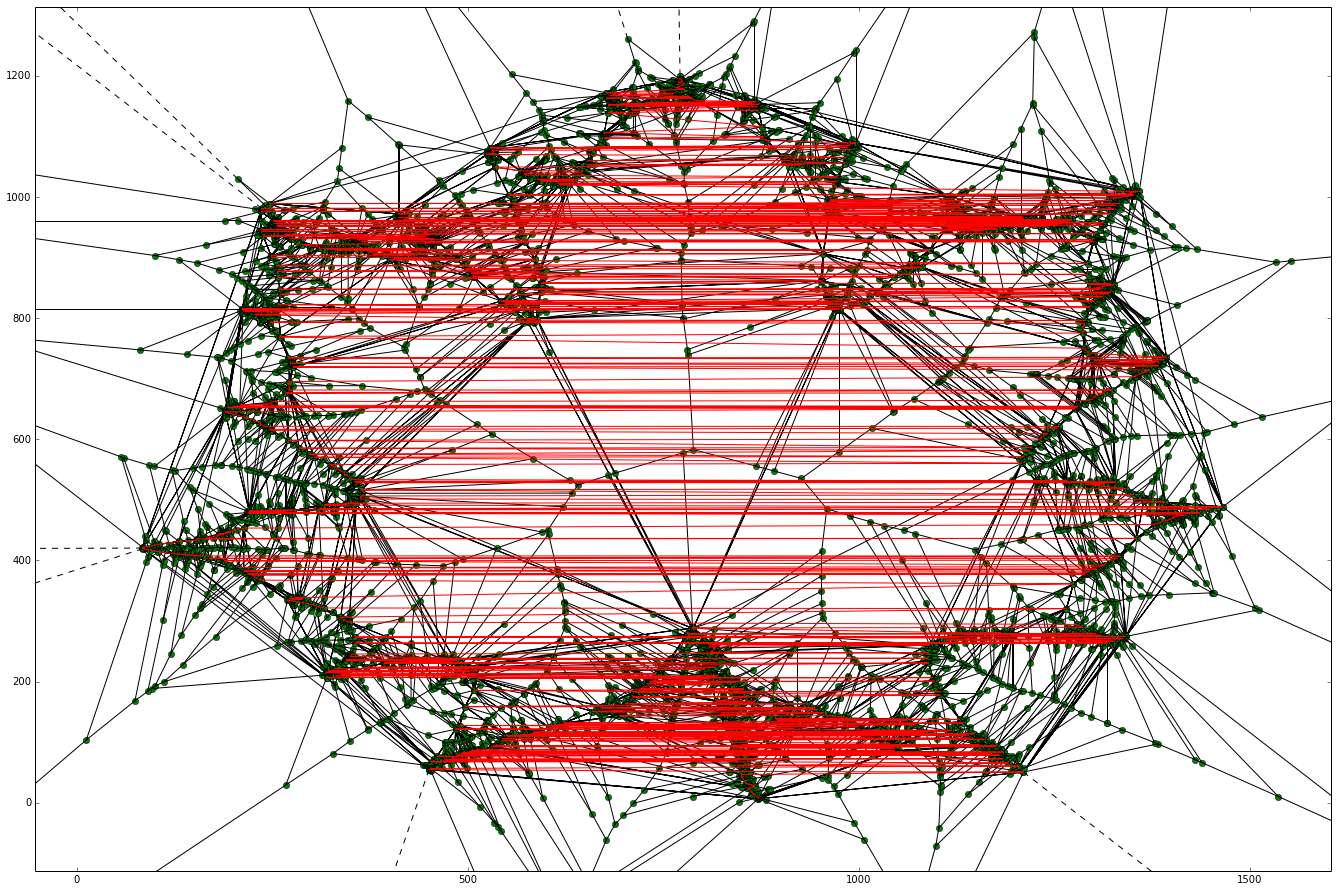

In [191]:
ax = plt.axes([0, 0, 3, 3])
mapoints = np.array(maplepoints)
vor = Voronoi(maplepoints)
voronoi_plot_2d(vor, ax=ax)
tri = Delaunay(mapoints)
plt.plot(mapoints[:,0],mapoints[:,1])
plt.triplot(mapoints[:,0], mapoints[:,1], tri.simplices.copy())
plt.show()